In [1]:
import pandas as pd
import pickle
import spacy
from matplotlib import pyplot as plt

In [2]:
file_path = "new_speeches_output.csv"
df = pd.read_csv(file_path)
text_verbal_interjections_df = df[(df['Verbal interjection'] > 0) & (df['Paragraph'].str.len() > 0)]
text_verbal_interjections_df

Filename  Period        Date  \
21      BT_19_001.xml      19  2017-10-24   
34      BT_19_001.xml      19  2017-10-24   
36      BT_19_001.xml      19  2017-10-24   
52      BT_19_001.xml      19  2017-10-24   
55      BT_19_001.xml      19  2017-10-24   
...               ...     ...         ...   
550687  BT_19_239.xml      19  2021-09-07   
550703  BT_19_239.xml      19  2021-09-07   
550706  BT_19_239.xml      19  2021-09-07   
550713  BT_19_239.xml      19  2021-09-07   
550714  BT_19_239.xml      19  2021-09-07   

                                                     Item  Speech #  \
21                              Beschlussfassung über die         1   
34                              Beschlussfassung über die         1   
36                              Beschlussfassung über die         1   
52                              Beschlussfassung über die         2   
55                              Beschlussfassung über die         2   
...                                                   ...       ...   
550687  Beratung der Beschlussempfehlung des Ausschuss...     33055   
550703  Beratung der Beschlussempfehlung des Ausschuss...     33056   
550706  Beratung der Beschlussempfehlung des Ausschuss...     33056   
550713  Beratung der Beschlussempfehlung des Ausschuss...     33056   
550714  Beratung der Beschlussempfehlung des Ausschuss...     33056   

        Paragraph #            Speaker Role    Gender    Party  \
21                8  Carsten Schneider   mp  männlich      SPD   
34               13  Carsten Schneider   mp  männlich      SPD   
36               14  Carsten Schneider   mp  männlich      SPD   
52                3      Bernd Baumann   mp  männlich      AfD   
55                4      Bernd Baumann   mp  männlich      AfD   
...             ...                ...  ...       ...      ...   
550687            1       Andreas Jung   mp  männlich  CDU/CSU   
550703            4      Götz Frömming   mp  männlich      AfD   
550706            5      Götz Frömming   mp  männlich      AfD   
550713           10      Götz Frömming   mp  männlich      AfD   
550714           10      Götz Frömming   mp  männlich      AfD   

                                                Paragraph  Interjection  \
21                                                   Was?          True   
34                                                    Oh!          True   
36      Warum habt ihr das bei Gerhard Schröder nicht ...          True   
52                                 Mir kommen die Tränen!          True   
55                                             Zur Sache!          True   
...                                                   ...           ...   
550687                                        Danke, SPD!          True   
550703  Das ist ein Rechtsanspruch! Wer nicht will, mu...          True   
550706                                  Das stimmt nicht!          True   
550713               Die Mütter werden im Stich gelassen!          True   
550714                  Nein, die lässt niemand im Stich!          True   

                  Interjector Interjector Gender Interjector Party  \
21      Katrin Göring-Eckardt           weiblich            GRUENE   
34                    Unknown                NaN           CDU/CSU   
36              Volker Kauder           männlich           CDU/CSU   
52                    Unknown                NaN               FDP   
55                    Unknown                NaN               FDP   
...                       ...                ...               ...   
550687            René Röspel           männlich               SPD   
550703    Christine Lambrecht           weiblich               SPD   
550706      Dr. Silke Launert           weiblich           CDU/CSU   
550713      Dr. Silke Launert           weiblich           CDU/CSU   
550714      Dr. Götz Frömming           männlich               AfD   

        Verbal interjection  Nonverbal interjection Interjection type  
21          

In [3]:
df

Filename  Period        Date  \
0       BT_19_001.xml      19  2017-10-24   
1       BT_19_001.xml      19  2017-10-24   
2       BT_19_001.xml      19  2017-10-24   
3       BT_19_001.xml      19  2017-10-24   
4       BT_19_001.xml      19  2017-10-24   
...               ...     ...         ...   
550756  BT_19_239.xml      19  2021-09-07   
550757  BT_19_239.xml      19  2021-09-07   
550758  BT_19_239.xml      19  2021-09-07   
550759  BT_19_239.xml      19  2021-09-07   
550760  BT_19_239.xml      19  2021-09-07   

                                                     Item  Speech #  \
0                               Beschlussfassung über die         1   
1                               Beschlussfassung über die         1   
2                               Beschlussfassung über die         1   
3                               Beschlussfassung über die         1   
4                               Beschlussfassung über die         1   
...                                                   ...       ...   
550756  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550757  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550758  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550759  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550760  Beratung der Beschlussempfehlung des Ausschuss...     33060   

        Paragraph #            Speaker Role    Gender Party  \
0                 1  Carsten Schneider   mp  männlich   SPD   
1                 2  Carsten Schneider   mp  männlich   SPD   
2                 2  Carsten Schneider   mp  männlich   SPD   
3                 2  Carsten Schneider   mp  männlich   SPD   
4                 2  Carsten Schneider   mp  männlich   SPD   
...             ...                ...  ...       ...   ...   
550756            5     Florian Toncar   mp  männlich   FDP   
550757            5     Florian Toncar   mp  männlich   FDP   
550758            6     Florian Toncar   mp  männlich   FDP   
550759            7     Florian Toncar   mp  männlich   FDP   
550760            7     Florian Toncar   mp  männlich   FDP   

                                                Paragraph  Interjection  \
0       Sehr geehrter Herr Präsident! Sehr geehrte Kol...         False   
1       In diesem Haus debattieren wir über die besten...         False   
2                                                     NaN          True   
3                                                     NaN          True   
4                                                     NaN          True   
...                                                   ...           ...   
550756  Wenn man sich anschaut, wie dieses Gesetz zust...         False   
550757                                                NaN          True   
550758  Wir brauchen eine andere Mentalität, einen and...         False   
550759                                   Herzlichen Dank.         False   
550760                                                NaN          True   

             Interjector Interjector Gender Interjector Party  \
0                    NaN                NaN               NaN   
1                    NaN                NaN               NaN   
2                    all           weiblich               SPD   
3                    all           weiblich         DIE LINKE   
4       Britta Haßelmann           weiblich            GRUENE   
...                  ...                ...               ...   
550756               NaN                NaN               NaN   
550757               all                NaN               FDP   
550758               NaN                NaN               NaN   
550759               NaN                NaN               NaN   
550760               all                NaN               FDP   

        Verbal interjection  Nonverbal interjection Interjection type  
0                     False                   False               NaN  
1                     False         

In [4]:
nlp = spacy.load("de_core_news_sm", disable=["ner", "lemmatizer", "transformer"])

In [8]:
df['next_verbal_interjection'] = False
df['next_nonverbal_interjection'] = False
df['next_interjectors'] = [[]] * len(df)

for group, group_df in df.groupby(['Speech #', 'Paragraph #']):
    for i in range(len(group_df)):
        if not group_df.iloc[i]['Interjection']:
            subsequent_rows = group_df.iloc[i+1:]

            # Check if there are any future interjections
            if (subsequent_rows['Verbal interjection'] | subsequent_rows['Nonverbal interjection']).any():
                df.at[group_df.index[i], 'next_verbal_interjection'] = subsequent_rows['Verbal interjection'].any()
                df.at[group_df.index[i], 'next_nonverbal_interjection'] = subsequent_rows['Nonverbal interjection'].any()

                # Create list of tuples (Type, Interjector, Party, Interjection Type)
                interjections = [
                    (
                        'Verbal' if row['Verbal interjection'] else 'Nonverbal',
                        row['Interjector'],
                        row['Interjector Party'],
                        row['Interjection type'],
                        row['Paragraph']
                    )
                    for _, row in subsequent_rows.iterrows() if row['Verbal interjection'] or row['Nonverbal interjection']
                ]

                df.at[group_df.index[i], 'next_interjections'] = interjections
            last_speech_paragraph = group_df.iloc[i]['Paragraph']

        else:
            if last_speech_paragraph is not None:
                df.at[group_df.index[i], 'Speaker Paragraph'] = last_speech_paragraph

In [9]:
df

Filename  Period        Date  \
0       BT_19_001.xml      19  2017-10-24   
1       BT_19_001.xml      19  2017-10-24   
2       BT_19_001.xml      19  2017-10-24   
3       BT_19_001.xml      19  2017-10-24   
4       BT_19_001.xml      19  2017-10-24   
...               ...     ...         ...   
550756  BT_19_239.xml      19  2021-09-07   
550757  BT_19_239.xml      19  2021-09-07   
550758  BT_19_239.xml      19  2021-09-07   
550759  BT_19_239.xml      19  2021-09-07   
550760  BT_19_239.xml      19  2021-09-07   

                                                     Item  Speech #  \
0                               Beschlussfassung über die         1   
1                               Beschlussfassung über die         1   
2                               Beschlussfassung über die         1   
3                               Beschlussfassung über die         1   
4                               Beschlussfassung über die         1   
...                                                   ...       ...   
550756  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550757  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550758  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550759  Beratung der Beschlussempfehlung des Ausschuss...     33060   
550760  Beratung der Beschlussempfehlung des Ausschuss...     33060   

        Paragraph #            Speaker Role    Gender Party  ...  \
0                 1  Carsten Schneider   mp  männlich   SPD  ...   
1                 2  Carsten Schneider   mp  männlich   SPD  ...   
2                 2  Carsten Schneider   mp  männlich   SPD  ...   
3                 2  Carsten Schneider   mp  männlich   SPD  ...   
4                 2  Carsten Schneider   mp  männlich   SPD  ...   
...             ...                ...  ...       ...   ...  ...   
550756            5     Florian Toncar   mp  männlich   FDP  ...   
550757            5     Florian Toncar   mp  männlich   FDP  ...   
550758            6     Florian Toncar   mp  männlich   FDP  ...   
550759            7     Florian Toncar   mp  männlich   FDP  ...   
550760            7     Florian Toncar   mp  männlich   FDP  ...   

       Interjector Gender  Interjector Party Verbal interjection  \
0                     NaN                NaN               False   
1                     NaN                NaN               False   
2                weiblich                SPD               False   
3                weiblich          DIE LINKE               False   
4                weiblich             GRUENE               False   
...                   ...                ...                 ...   
550756                NaN                NaN               False   
550757                NaN                FDP               False   
550758                NaN                NaN               False   
550759                NaN                NaN               False   
550760                NaN                FDP               False   

       Nonverbal interjection Interjection type  next_verbal_interjection  \
0                       False               NaN                     False   
1                       False               NaN                     False   
2                        True           Beifall                     False   
3                        True           Beifall                     False   
4                        True           Beifall                     False   
...                       ...               ...                       ...   
550756                  False               NaN                     False   
550757                   True           Beifall                     False   
550758                  False               NaN                     False   
550759                  False               NaN                     False   
550760                   True           Beifall                     False   

        next_nonverbal_interjection next_interjectors  \
0  

In [10]:
df.to_csv('party_mentions/speeches.csv', index=False)

In [32]:
def preprocess_text_BERT(text):
    '''Tokenize for BERT input, return list of strings'''
    doc = nlp(text)
    return [token.text for token in doc]

def spacy_sent_tokenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

def preprocess_utterances_BERT_with_ids(text):
    """
    Tokenize for BERT input and return a list of tuples containing
    the utterance and its corresponding ID within the paragraph.
    """
    utterances = spacy_sent_tokenize(text)
    utterance_ids = list(range(len(utterances)))
    return list(zip(utterance_ids, utterances))


def sentence_tokenize_tags(text):
    '''Tokenize for BERT input, encode first token of sentence with "B", rest with "I".'''
    sentence_list = spacy_sent_tokenize(text)
    tag_list = []

    for sentence in sentence_list:
        tokens = [token.text for token in nlp(sentence)]
        if tokens:
            tag_list.append("B")
            tag_list.extend(["I"] * (len(tokens) - 1))

    return tag_list

def encode_custom(target, before, after):
    custom_token_type_ids = []

    target = target if isinstance(target, str) else ""
    before = before if isinstance(before, str) else ""
    after = after if isinstance(after, str) else ""

    target_tokens = preprocess_text_BERT(target)
    before_tokens = preprocess_text_BERT(before) if before else []
    after_tokens = preprocess_text_BERT(after) if after else []

    custom_token_type_ids.extend([0] * len(before_tokens))

    custom_token_type_ids.extend([1] * len(target_tokens))

    custom_token_type_ids.extend([0] * len(after_tokens))

    return custom_token_type_ids

def compute_token_sentence_ids(gold_segmentation_list):
    token_sentence_ids = []
    sentence_id = -1
    for tag in gold_segmentation_list:
        if tag == 'B':
            sentence_id += 1
        token_sentence_ids.append(sentence_id)
    return token_sentence_ids


In [314]:
text_speeches_df = df[~df['Interjection']]

# Get only last 5 sessions
last_5_filenames = text_speeches_df['Filename'].drop_duplicates().tail()

text_speeches_df = text_speeches_df[text_speeches_df['Filename'].isin(last_5_filenames)]


text_speeches_df['Speech'] = text_speeches_df.groupby('Speech #')['Paragraph'].transform(' '.join)

text_speeches_df['Sentences'] = text_speeches_df['Paragraph'].apply(spacy_sent_tokenize)

text_speeches_exploded = text_speeches_df.explode("Sentences", ignore_index=True)

text_speeches_exploded["prev_sentence"] = text_speeches_exploded.groupby("Speech #")["Sentences"].shift(1)
text_speeches_exploded["next_sentence"] = text_speeches_exploded.groupby("Speech #")["Sentences"].shift(-1)

text_speeches_exploded['is_last_sentence'] = text_speeches_exploded.groupby('Paragraph').cumcount(ascending=False) == 0

text_speeches_exploded['next_verbal_interjection'] = text_speeches_exploded['is_last_sentence'] * text_speeches_exploded['next_verbal_interjection']
text_speeches_exploded['next_nonverbal_interjection'] = text_speeches_exploded['is_last_sentence'] * text_speeches_exploded['next_nonverbal_interjection']

text_speeches_exploded['next_verbal_interjection'] = text_speeches_exploded.groupby('Paragraph')['next_verbal_interjection'].ffill()
text_speeches_exploded['next_nonverbal_interjection'] = text_speeches_exploded.groupby('Paragraph')['next_nonverbal_interjection'].ffill()

text_speeches_exploded['next_interjections'] = text_speeches_exploded['is_last_sentence'] * text_speeches_exploded['next_interjections']
text_speeches_exploded['next_interjections'] = text_speeches_exploded.groupby('Paragraph')['next_interjections'].ffill()

text_speeches_exploded["prev_sentence"] = text_speeches_exploded["prev_sentence"].fillna("")
text_speeches_exploded["Sentences"] = text_speeches_exploded["Sentences"].fillna("")
text_speeches_exploded["next_sentence"] = text_speeches_exploded["next_sentence"].fillna("")
text_speeches_exploded

Filename  Period        Date  \
0      BT_19_235.xml      19  2021-06-23   
1      BT_19_235.xml      19  2021-06-23   
2      BT_19_235.xml      19  2021-06-23   
3      BT_19_235.xml      19  2021-06-23   
4      BT_19_235.xml      19  2021-06-23   
...              ...     ...         ...   
18604  BT_19_239.xml      19  2021-09-07   
18605  BT_19_239.xml      19  2021-09-07   
18606  BT_19_239.xml      19  2021-09-07   
18607  BT_19_239.xml      19  2021-09-07   
18608  BT_19_239.xml      19  2021-09-07   

                                                    Item  Speech #  \
0      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
1      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
2      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
3      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
4      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
...                                                  ...       ...   
18604  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18605  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18606  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18607  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18608  Beratung der Beschlussempfehlung des Ausschuss...     33060   

       Paragraph #         Speaker Role    Gender Party  ...  \
0                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
1                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
2                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
3                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
4                2    Aydan Özoğuz   mp  weiblich   SPD  ...   
...            ...             ...  ...       ...   ...  ...   
18604            5  Florian Toncar   mp  männlich   FDP  ...   
18605            5  Florian Toncar   mp  männlich   FDP  ...   
18606            6  Florian Toncar   mp  männlich   FDP  ...   
18607            6  Florian Toncar   mp  männlich   FDP  ...   
18608            7  Florian Toncar   mp  männlich   FDP  ...   

      Interjection type  next_verbal_interjection next_nonverbal_interjection  \
0                   NaN                     False                       False   
1                   NaN                     False                       False   
2                   NaN                     False                       False   
3                   NaN                     False                       False   
4                   NaN                     False                       False   
...                 ...                       ...                         ...   
18604               NaN                     False                       False   
18605               NaN                     False                        True   
18606               NaN                     False                       False   
18607               NaN                     False                       False   
18608               NaN                     False                        True   

      next_verbal_interjector                     next_interjections  \
0                         NaN                                     []   
1                         NaN                                     []   
2                         NaN                                     []   
3                         NaN                                     []   
4                         NaN                                     []   
...                       ...                                    ...   
18604                     NaN                                     []   
18605                     NaN  [(Nonverbal, all, FDP, Beifall, nan)]   
18606                     NaN                                     []   
18607                     NaN                                     []   
18608                     NaN  [(Nonverbal, all, FDP, Beifall, nan)]   

                                   

In [18]:
utterance_df = text_speeches_exploded[['utterance_token_list', 'token_list', 'custom_token_type_ids', 'gold_segmentation_list', 'Sentences', 'token_sentence_ids', 'next_verbal_interjection', 'next_nonverbal_interjection']]

utterance_df

utterance_token_list  \
0                   [Sehr, geehrter, Herr, Präsident, !]   
1                 [Liebe, Kolleginnen, und, Kollegen, !]   
2      [Mit, dem, Abzug, der, NATO-Truppen, nach, zwe...   
3      [Und, der, Ausgang, der, Verhandlungen, ist, w...   
4      [Für, unsere, Bundeswehr, schließt, sich, zunä...   
...                                                  ...   
18604  [Wenn, man, sich, anschaut, ,, wie, dieses, Ge...   
18605  [Ich, glaube, nicht, ,, dass, man, so, arbeite...   
18606  [Wir, brauchen, eine, andere, Mentalität, ,, e...   
18607  [Das, wird, sich, hoffentlich, nach, dem, 26.,...   
18608                              [Herzlichen, Dank, .]   

                                              token_list  \
0      [Sehr, geehrter, Herr, Präsident, !, Liebe, Ko...   
1      [Sehr, geehrter, Herr, Präsident, !, Liebe, Ko...   
2      [Sehr, geehrter, Herr, Präsident, !, Liebe, Ko...   
3      [Sehr, geehrter, Herr, Präsident, !, Liebe, Ko...   
4      [Sehr, geehrter, Herr, Präsident, !, Liebe, Ko...   
...                                                  ...   
18604  [Vielen, Dank, ., –, Frau, Präsidentin, !, Lie...   
18605  [Vielen, Dank, ., –, Frau, Präsidentin, !, Lie...   
18606  [Vielen, Dank, ., –, Frau, Präsidentin, !, Lie...   
18607  [Vielen, Dank, ., –, Frau, Präsidentin, !, Lie...   
18608  [Vielen, Dank, ., –, Frau, Präsidentin, !, Lie...   

                                   custom_token_type_ids  \
0                         [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]   
1      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...   
2      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...   
...                                                  ...   
18604  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
18605  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
18606  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
18607  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
18608         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]   

                                  gold_segmentation_list  \
0      [B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...   
1      [B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...   
2      [B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...   
3      [B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...   
4      [B, I, I, I, I, B, I, I, I, I, B, I, I, I, I, ...   
...                                                  ...   
18604  [B, I, I, B, I, I, I, B, I, I, I, I, B, I, I, ...   
18605  [B, I, I, B, I, I, I, B, I, I, I, I, B, I, I, ...   
18606  [B, I, I, B, I, I, I, B, I, I, I, I, B, I, I, ...   
18607  [B, I, I, B, I, I, I, B, I, I, I, I, B, I, I, ...   
18608  [B, I, I, B, I, I, I, B, I, I, I, I, B, I, I, ...   

                                               Sentences  \
0                          Sehr geehrter Herr Präsident!   
1                        Liebe Kolleginnen und Kollegen!   
2      Mit dem Abzug der NATO-Truppen nach zwei Jahrz...   
3      Und der Ausgang der Verhandlungen ist weiterhi...   
4      Für unsere Bundeswehr schließt sich zunächst e...   
...                                                  ...   
18604  Wenn man sich anschaut, wie dieses Gesetz zust...   
18605  Ich glaube nicht, dass man so arbeiten kann, w...   
18606  Wir brauchen eine andere Mentalität, einen and...   
18607  Das wird sich hoffentlich nach dem 26. Septemb...   
18608                                   Herzlichen Dank.   

                                      token_sentence_ids  \
0      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...   
1      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...   
2      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...   
3      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...   
4      [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...   
...                                                  ...   
18604  [0, 

In [19]:
with open("speech_output.pkl", "wb") as f:
    pickle.dump(utterance_df, f)

print("Pickle file created successfully!")


Pickle file created successfully!


In [94]:
text_speeches_exploded

Filename  Period        Date  \
0      BT_19_235.xml      19  2021-06-23   
1      BT_19_235.xml      19  2021-06-23   
2      BT_19_235.xml      19  2021-06-23   
3      BT_19_235.xml      19  2021-06-23   
4      BT_19_235.xml      19  2021-06-23   
...              ...     ...         ...   
18604  BT_19_239.xml      19  2021-09-07   
18605  BT_19_239.xml      19  2021-09-07   
18606  BT_19_239.xml      19  2021-09-07   
18607  BT_19_239.xml      19  2021-09-07   
18608  BT_19_239.xml      19  2021-09-07   

                                                    Item  Speech #  \
0      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
1      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
2      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
3      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
4      Aktuelle Stunde zum geordneten Rückzug der NAT...     32489   
...                                                  ...       ...   
18604  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18605  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18606  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18607  Beratung der Beschlussempfehlung des Ausschuss...     33060   
18608  Beratung der Beschlussempfehlung des Ausschuss...     33060   

       Paragraph #         Speaker Role    Gender Party  ...  \
0                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
1                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
2                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
3                1    Aydan Özoğuz   mp  weiblich   SPD  ...   
4                2    Aydan Özoğuz   mp  weiblich   SPD  ...   
...            ...             ...  ...       ...   ...  ...   
18604            5  Florian Toncar   mp  männlich   FDP  ...   
18605            5  Florian Toncar   mp  männlich   FDP  ...   
18606            6  Florian Toncar   mp  männlich   FDP  ...   
18607            6  Florian Toncar   mp  männlich   FDP  ...   
18608            7  Florian Toncar   mp  männlich   FDP  ...   

      Verbal interjection  Nonverbal interjection Interjection type  \
0                   False                   False               NaN   
1                   False                   False               NaN   
2                   False                   False               NaN   
3                   False                   False               NaN   
4                   False                   False               NaN   
...                   ...                     ...               ...   
18604               False                   False               NaN   
18605               False                   False               NaN   
18606               False                   False               NaN   
18607               False                   False               NaN   
18608               False                   False               NaN   

      next_verbal_interjection next_nonverbal_interjection  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
...                        ...                         ...   
18604                    False                       False   
18605                    False                        True   
18606                    False                       False   
18607                    False                       False   
18608                    False                        True   

                                                  Speech  \
0      Sehr geehrter Herr Präsident! Liebe Kolleginne...   
1      Sehr geehrter Herr Präsident! Liebe Kolleginne...   
2      Sehr geehrter Herr Präsident! Liebe Kolleginne...   
3      Sehr geehrter Herr Präsident

In [315]:
results_speeches_no_int = "predictions/predictions_interjections.csv"
results_interjections = pd.read_csv(results_speeches_no_int)

results_speeches_no_int_nv_int = "predictions/predictions_speeches.csv"
results_speeches = pd.read_csv(results_speeches_no_int_nv_int)

interjections_metadata = pd.read_csv("predictions/interjections_metadata.csv")

In [316]:
results_speeches

utterance_token_list  \
0         ['Sehr', 'geehrter', 'Herr', 'Präsident', '!']   
1       ['Liebe', 'Kolleginnen', 'und', 'Kollegen', '!']   
2      ['Mit', 'dem', 'Abzug', 'der', 'NATO-Truppen',...   
3      ['Und', 'der', 'Ausgang', 'der', 'Verhandlunge...   
4      ['Für', 'unsere', 'Bundeswehr', 'schließt', 's...   
...                                                  ...   
18604  ['Wenn', 'man', 'sich', 'anschaut', ',', 'wie'...   
18605  ['Ich', 'glaube', 'nicht', ',', 'dass', 'man',...   
18606  ['Wir', 'brauchen', 'eine', 'andere', 'Mentali...   
18607  ['Das', 'wird', 'sich', 'hoffentlich', 'nach',...   
18608                        ['Herzlichen', 'Dank', '.']   

                                               Sentences predicted_labels  \
0                          Sehr geehrter Herr Präsident!               []   
1                        Liebe Kolleginnen und Kollegen!   ['Evaluation']   
2      Mit dem Abzug der NATO-Truppen nach zwei Jahrz...   ['Evaluation']   
3      Und der Ausgang der Verhandlungen ist weiterhi...   ['Evaluation']   
4      Für unsere Bundeswehr schließt sich zunächst e...   ['Evaluation']   
...                                                  ...              ...   
18604  Wenn man sich anschaut, wie dieses Gesetz zust...   ['Evaluation']   
18605  Ich glaube nicht, dass man so arbeiten kann, w...   ['Evaluation']   
18606  Wir brauchen eine andere Mentalität, einen and...   ['Evaluation']   
18607  Das wird sich hoffentlich nach dem 26. Septemb...   ['Evaluation']   
18608                                   Herzlichen Dank.               []   

                confidences  next_verbal_interjection  \
0                        []                     False   
1      [0.6003386974334717]                     False   
2      [0.9458218216896057]                     False   
3      [0.9652681946754456]                     False   
4      [0.9361100792884827]                     False   
...                     ...                       ...   
18604  [0.9888230562210083]                     False   
18605  [0.9566178917884827]                     False   
18606  [0.8635194897651672]                     False   
18607  [0.8821631073951721]                     False   
18608                    []                     False   

       next_nonverbal_interjection  
0                            False  
1                            False  
2                            False  
3                            False  
4                            False  
...                            ...  
18604                        False  
18605                         True  
18606                        False  
18607                        False  
18608                         True  

[18609 rows x 6 columns]

In [317]:
results_speeches['Speaker'] = text_speeches_exploded['Speaker']
results_speeches['Gender'] = text_speeches_exploded['Gender']
results_speeches['Party'] = text_speeches_exploded['Party']
results_speeches['Filename'] = text_speeches_exploded['Filename']

# i added this after getting model predictions because i realized i should get all interjections, not only intermediate ones
results_speeches['next_verbal_interjection'] = text_speeches_exploded['next_verbal_interjection']
results_speeches['next_verbal_interjection'] = text_speeches_exploded['next_verbal_interjection']
results_speeches['next_interjections'] = text_speeches_exploded['next_interjections']

results_interjections['Speaker'] = interjections_metadata['Speaker']
results_interjections['Gender'] = interjections_metadata['Gender']
results_interjections['Party'] = interjections_metadata['Party']
results_interjections['Interjector'] = interjections_metadata['Interjector']
results_interjections['Interjector Party'] = interjections_metadata['Interjector Party']
results_interjections['Interjector Gender'] = interjections_metadata['Interjector Gender']
results_interjections['Filename'] = interjections_metadata['Filename']


In [318]:
speeches_not_followed_interjections = results_speeches[
    (results_speeches['next_verbal_interjection'] == False) &
    (results_speeches['next_nonverbal_interjection'] == False)]

speeches_followed_verbal_interjections  = results_speeches[results_speeches['next_verbal_interjection'] == True]

speeches_followed_nonverbal_interjections  = results_speeches[results_speeches['next_nonverbal_interjection'] == True]

speeches_followed_both = results_speeches[
    (results_speeches['next_verbal_interjection'] == True) &
    (results_speeches['next_nonverbal_interjection'] == True)]

speeches_followed_either = results_speeches[
    (results_speeches['next_verbal_interjection'] == True) |
    (results_speeches['next_nonverbal_interjection'] == True)]


In [319]:
results_speeches

utterance_token_list  \
0         ['Sehr', 'geehrter', 'Herr', 'Präsident', '!']   
1       ['Liebe', 'Kolleginnen', 'und', 'Kollegen', '!']   
2      ['Mit', 'dem', 'Abzug', 'der', 'NATO-Truppen',...   
3      ['Und', 'der', 'Ausgang', 'der', 'Verhandlunge...   
4      ['Für', 'unsere', 'Bundeswehr', 'schließt', 's...   
...                                                  ...   
18604  ['Wenn', 'man', 'sich', 'anschaut', ',', 'wie'...   
18605  ['Ich', 'glaube', 'nicht', ',', 'dass', 'man',...   
18606  ['Wir', 'brauchen', 'eine', 'andere', 'Mentali...   
18607  ['Das', 'wird', 'sich', 'hoffentlich', 'nach',...   
18608                        ['Herzlichen', 'Dank', '.']   

                                               Sentences predicted_labels  \
0                          Sehr geehrter Herr Präsident!               []   
1                        Liebe Kolleginnen und Kollegen!   ['Evaluation']   
2      Mit dem Abzug der NATO-Truppen nach zwei Jahrz...   ['Evaluation']   
3      Und der Ausgang der Verhandlungen ist weiterhi...   ['Evaluation']   
4      Für unsere Bundeswehr schließt sich zunächst e...   ['Evaluation']   
...                                                  ...              ...   
18604  Wenn man sich anschaut, wie dieses Gesetz zust...   ['Evaluation']   
18605  Ich glaube nicht, dass man so arbeiten kann, w...   ['Evaluation']   
18606  Wir brauchen eine andere Mentalität, einen and...   ['Evaluation']   
18607  Das wird sich hoffentlich nach dem 26. Septemb...   ['Evaluation']   
18608                                   Herzlichen Dank.               []   

                confidences  next_verbal_interjection  \
0                        []                     False   
1      [0.6003386974334717]                     False   
2      [0.9458218216896057]                     False   
3      [0.9652681946754456]                     False   
4      [0.9361100792884827]                     False   
...                     ...                       ...   
18604  [0.9888230562210083]                     False   
18605  [0.9566178917884827]                     False   
18606  [0.8635194897651672]                     False   
18607  [0.8821631073951721]                     False   
18608                    []                     False   

       next_nonverbal_interjection         Speaker    Gender Party  \
0                            False    Aydan Özoğuz  weiblich   SPD   
1                            False    Aydan Özoğuz  weiblich   SPD   
2                            False    Aydan Özoğuz  weiblich   SPD   
3                            False    Aydan Özoğuz  weiblich   SPD   
4                            False    Aydan Özoğuz  weiblich   SPD   
...                            ...             ...       ...   ...   
18604                        False  Florian Toncar  männlich   FDP   
18605                         True  Florian Toncar  männlich   FDP   
18606                        False  Florian Toncar  männlich   FDP   
18607                        False  Florian Toncar  männlich   FDP   
18608                         True  Florian Toncar  männlich   FDP   

            Filename                     next_interjections  
0      BT_19_235.xml                                     []  
1      BT_19_235.xml                                     []  
2      BT_19_235.xml                                     []  
3      BT_19_235.xml                                     []  
4      BT_19_235.xml                                     []  
...              ...                                    ...  
18604  BT_19_239.xml                                     []  
18605  BT_19_239.xml  [(Nonverbal, all, FDP, Beifall, nan)]  
18606  BT_19_239.xml                                     []  
18607  BT_19_239.xml                                     []  
18608  BT_19_239.xml  [(Nonverbal, all, FDP, Beifall, nan)]  

[18609 rows x 11 columns]

In [320]:
speeches_followed_verbal_interjections

utterance_token_list  \
70     ['Und', 'als', 'der', 'Oberst', 'Klein', 'in',...   
91     ['Ich', 'möchte', 'nicht', 'das', 'Bild', 'der...   
198    ['Und', 'das', 'ist', 'meines', 'Erachtens', '...   
220    ['Ich', 'finde', ',', 'die', 'Gewissensfreihei...   
265    ['Was', 'dieser', 'Tage', 'in', 'Afghanistan',...   
...                                                  ...   
18483  ['Aber', 'wir', 'machen', 'damit', 'deutlich',...   
18512  ['Sie', 'geben', 'es', 'selber', 'zu', 'bzw.',...   
18516  ['Hier', 'greift', 'der', 'Staat', 'einmal', '...   
18517  ['indem', 'er', 'ihnen', 'diese', 'Entscheidun...   
18531                     ['Ich', 'danke', 'Ihnen', '.']   

                                               Sentences predicted_labels  \
70     Und als der Oberst Klein in Kunduz endlich mal...   ['Evaluation']   
91     Ich möchte nicht das Bild der amerikanischen H...   ['Evaluation']   
198    Und das ist meines Erachtens wirklich ein schw...   ['Evaluation']   
220    Ich finde, die Gewissensfreiheit der Abgeordne...   ['Evaluation']   
265    Was dieser Tage in Afghanistan zu Ende geht, i...   ['Evaluation']   
...                                                  ...              ...   
18483  Aber wir machen damit deutlich, dass wir in di...   ['Evaluation']   
18512  Sie geben es selber zu bzw. im Textteil des Ge...       ['Report']   
18516  Hier greift der Staat einmal mehr in die Kompe...   ['Evaluation']   
18517  indem er ihnen diese Entscheidung abnehmen wil...   ['Evaluation']   
18531                                   Ich danke Ihnen.   ['Expressive']   

                confidences  next_verbal_interjection  \
70     [0.9138511419296265]                      True   
91     [0.8847185969352722]                      True   
198    [0.9757646918296814]                      True   
220    [0.8388696312904358]                      True   
265     [0.835075318813324]                      True   
...                     ...                       ...   
18483  [0.8767716288566589]                      True   
18512   [0.608445942401886]                      True   
18516  [0.9563095569610596]                      True   
18517  [0.9511432647705078]                      True   
18531  [0.5022090673446655]                      True   

       next_nonverbal_interjection              Speaker    Gender      Party  \
70                           False  Armin-Paulus Hampel  männlich        AfD   
91                           False  Armin-Paulus Hampel  männlich        AfD   
198                           True      Dietmar Bartsch  männlich  DIE LINKE   
220                          False       Omid Nouripour  männlich     GRUENE   
265                          False     Rüdiger Lucassen  männlich        AfD   
...                            ...                  ...       ...        ...   
18483                         True         Andreas Jung  männlich    CDU/CSU   
18512                        False        Götz Frömming  männlich        AfD   
18516                        False        Götz Frömming  männlich        AfD   
18517                         True        Götz Frömming  männlich        AfD   
18531                         True        Götz Frömming  männlich        AfD   

            Filename                                 next_interjections  
70     BT_19_235.xml   [(Verbal, Unknown, DIE LINKE, Widerspruch, nan)]  
91     BT_19_235.xml  [(Verbal, Britta Haßelmann, GRUENE, Zuruf, Gut...  
198    BT_19_235.xml  [(Nonverbal, all, DIE LINKE, Beifall, nan), (V...  
220    BT_19_235.xml  [(Verbal, Alexander Graf Lambsdorff, FDP, Zuru...  
265    BT_19_235.xml  [(Verbal, Dr. Nils Schmid, SPD, Zuruf, Das sag...  
...              ...                                                ...  
18483  BT_19_239.xml  [(Nonverbal, Hermann Gröhe, CDU/CSU, Beifall, ...  
18512  BT_19_239.xml           [(Verbal, Ulli Nissen, SPD, Zuruf, nan)]  
18516  BT_19_239.xml  [(Verbal, Christine Lambrecht, SPD, Zuruf, Das...  
1851

In [321]:
speeches_followed_nonverbal_interjections

utterance_token_list  \
7      ['Als', 'Abgeordnete', 'des', 'Deutschen', 'Bu...   
34     ['Das', 'ist', 'ein', 'Erfolg', 'für', 'uns', ...   
50     ['Liebe', 'Soldaten', 'der', 'Bundeswehr', 'do...   
72     ['Das', 'ist', 'die', 'Realität', 'damals', 'g...   
102    ['Unser', 'Dank', 'für', 'dieses', 'komplexe',...   
...                                                  ...   
18587                            ['Vielen', 'Dank', '.']   
18595  ['Wir', 'glauben', ',', 'dass', 'das', 'ein', ...   
18599  ['Das', 'ist', 'die', 'eigentliche', 'Arbeit',...   
18605  ['Ich', 'glaube', 'nicht', ',', 'dass', 'man',...   
18608                        ['Herzlichen', 'Dank', '.']   

                                               Sentences predicted_labels  \
7      Als Abgeordnete des Deutschen Bundestages trag...   ['Evaluation']   
34     Das ist ein Erfolg für uns alle und für Afghan...   ['Evaluation']   
50     Liebe Soldaten der Bundeswehr dort oben auf de...   ['Evaluation']   
72                  Das ist die Realität damals gewesen,   ['Evaluation']   
102    Unser Dank für dieses komplexe Engagement gilt...   ['Evaluation']   
...                                                  ...              ...   
18587                                       Vielen Dank.               []   
18595  Wir glauben, dass das ein wichtiges Signal an ...   ['Evaluation']   
18599  Das ist die eigentliche Arbeit, über die erst ...   ['Evaluation']   
18605  Ich glaube nicht, dass man so arbeiten kann, w...   ['Evaluation']   
18608                                   Herzlichen Dank.               []   

                confidences  next_verbal_interjection  \
7       [0.641599178314209]                     False   
34      [0.921824038028717]                     False   
50     [0.7236455678939819]                     False   
72     [0.9438180923461914]                     False   
102    [0.8452498912811279]                     False   
...                     ...                       ...   
18587                    []                     False   
18595  [0.8535077571868896]                     False   
18599  [0.9243990778923035]                     False   
18605  [0.9566178917884827]                     False   
18608                    []                     False   

       next_nonverbal_interjection              Speaker    Gender   Party  \
7                             True         Aydan Özoğuz  weiblich     SPD   
34                            True         Aydan Özoğuz  weiblich     SPD   
50                            True  Armin-Paulus Hampel  männlich     AfD   
72                            True  Armin-Paulus Hampel  männlich     AfD   
102                           True     Bijan Djir-Sarai  männlich     FDP   
...                            ...                  ...       ...     ...   
18587                         True     Britta Haßelmann  weiblich  GRUENE   
18595                         True       Florian Toncar  männlich     FDP   
18599                         True       Florian Toncar  männlich     FDP   
18605                         True       Florian Toncar  männlich     FDP   
18608                         True       Florian Toncar  männlich     FDP   

            Filename                                 next_interjections  
7      BT_19_235.xml  [(Nonverbal, all, SPD, Beifall, nan), (Nonverb...  
34     BT_19_235.xml  [(Nonverbal, all, SPD, Beifall, nan), (Nonverb...  
50     BT_19_235.xml              [(Nonverbal, all, AfD, Beifall, nan)]  
72     BT_19_235.xml              [(Nonverbal, all, AfD, Beifall, nan)]  
102    BT_19_235.xml  [(Nonverbal, all, FDP, Beifall, nan), (Nonverb...  
...              ...                                                ...  
18587  BT_19_239.xml  [(Nonverbal, all, GRUENE, Beifall, nan), (Nonv...  
18595  BT_19_239.xml  [(Nonverbal, all, FDP, Beifall, nan), (Nonverb...  
18599  BT_19_239.xml              [(Nonverbal, all, FDP, Beifall, nan)]  
18605  BT_19_239.xml              [(Nonv

In [322]:
speeches_followed_both

utterance_token_list  \
198    ['Und', 'das', 'ist', 'meines', 'Erachtens', '...   
294    ['Jedes', 'Volk', 'hat', 'ein', 'Recht', 'auf'...   
317    ['Aber', ',', 'meine', 'sehr', 'verehrten', 'D...   
321    ['Deswegen', 'war', 'es', 'richtig', ',', 'hie...   
327    ['Das', 'sind', 'skandalöse', 'Bemerkungen', '.']   
...                                                  ...   
18376  ['Die', 'Entfesselung', 'der', 'Wirtschaft', '...   
18453  ['Das', 'ist', 'diskriminierend', ',', 'und', ...   
18483  ['Aber', 'wir', 'machen', 'damit', 'deutlich',...   
18517  ['indem', 'er', 'ihnen', 'diese', 'Entscheidun...   
18531                     ['Ich', 'danke', 'Ihnen', '.']   

                                               Sentences predicted_labels  \
198    Und das ist meines Erachtens wirklich ein schw...   ['Evaluation']   
294    Jedes Volk hat ein Recht auf kulturelle Selbst...   ['Evaluation']   
317    Aber, meine sehr verehrten Damen und Herren, w...   ['Evaluation']   
321    Deswegen war es richtig, hier militärisch einz...   ['Evaluation']   
327                     Das sind skandalöse Bemerkungen.   ['Evaluation']   
...                                                  ...              ...   
18376  Die Entfesselung der Wirtschaft wird es uns au...   ['Evaluation']   
18453  Das ist diskriminierend, und es ist vor allem ...   ['Evaluation']   
18483  Aber wir machen damit deutlich, dass wir in di...   ['Evaluation']   
18517  indem er ihnen diese Entscheidung abnehmen wil...   ['Evaluation']   
18531                                   Ich danke Ihnen.   ['Expressive']   

                confidences  next_verbal_interjection  \
198    [0.9757646918296814]                      True   
294    [0.9389005899429321]                      True   
317    [0.9839445948600769]                      True   
321     [0.951701819896698]                      True   
327    [0.9604171514511108]                      True   
...                     ...                       ...   
18376  [0.9408708810806274]                      True   
18453  [0.9483579993247986]                      True   
18483  [0.8767716288566589]                      True   
18517  [0.9511432647705078]                      True   
18531  [0.5022090673446655]                      True   

       next_nonverbal_interjection                Speaker    Gender  \
198                           True        Dietmar Bartsch  männlich   
294                           True       Rüdiger Lucassen  männlich   
317                           True  Johann David Wadephul  männlich   
321                           True  Johann David Wadephul  männlich   
327                           True  Johann David Wadephul  männlich   
...                            ...                    ...       ...   
18376                         True          Thorsten Frei  männlich   
18453                         True   Norbert Kleinwächter  männlich   
18483                         True           Andreas Jung  männlich   
18517                         True          Götz Frömming  männlich   
18531                         True          Götz Frömming  männlich   

           Party       Filename  \
198    DIE LINKE  BT_19_235.xml   
294          AfD  BT_19_235.xml   
317      CDU/CSU  BT_19_235.xml   
321      CDU/CSU  BT_19_235.xml   
327      CDU/CSU  BT_19_235.xml   
...          ...            ...   
18376    CDU/CSU  BT_19_239.xml   
18453        AfD  BT_19_239.xml   
18483    CDU/CSU  BT_19_239.xml   
18517        AfD  BT_19_239.xml   
18531        AfD  BT_19_239.xml   

                                      next_interjections  
198    [(Nonverbal, all, DIE LINKE, Beifall, nan), (V...  
294    [(Nonverbal, all, AfD, Beifall, nan), (Verbal,...  
317    [(Nonverbal, all, CDU/CSU, Beifall, nan), (Non...  
321    [(Nonverbal, all, CDU/CSU, Beifall, nan), (Non...  
327    [(Nonverbal, all, CDU/CSU, Beifall, nan), (Non...  
...                                                  ...  
18376  [(Nonverbal

In [173]:
speeches_followed_either

utterance_token_list  \
7      ['Als', 'Abgeordnete', 'des', 'Deutschen', 'Bu...   
34     ['Das', 'ist', 'ein', 'Erfolg', 'für', 'uns', ...   
50     ['Liebe', 'Soldaten', 'der', 'Bundeswehr', 'do...   
70     ['Und', 'als', 'der', 'Oberst', 'Klein', 'in',...   
72     ['Das', 'ist', 'die', 'Realität', 'damals', 'g...   
...                                                  ...   
18587                            ['Vielen', 'Dank', '.']   
18595  ['Wir', 'glauben', ',', 'dass', 'das', 'ein', ...   
18599  ['Das', 'ist', 'die', 'eigentliche', 'Arbeit',...   
18605  ['Ich', 'glaube', 'nicht', ',', 'dass', 'man',...   
18608                        ['Herzlichen', 'Dank', '.']   

                                               Sentences predicted_labels  \
7      Als Abgeordnete des Deutschen Bundestages trag...   ['Evaluation']   
34     Das ist ein Erfolg für uns alle und für Afghan...   ['Evaluation']   
50     Liebe Soldaten der Bundeswehr dort oben auf de...   ['Evaluation']   
70     Und als der Oberst Klein in Kunduz endlich mal...   ['Evaluation']   
72                  Das ist die Realität damals gewesen,   ['Evaluation']   
...                                                  ...              ...   
18587                                       Vielen Dank.               []   
18595  Wir glauben, dass das ein wichtiges Signal an ...   ['Evaluation']   
18599  Das ist die eigentliche Arbeit, über die erst ...   ['Evaluation']   
18605  Ich glaube nicht, dass man so arbeiten kann, w...   ['Evaluation']   
18608                                   Herzlichen Dank.               []   

                confidences  next_verbal_interjection  \
7       [0.641599178314209]                     False   
34      [0.921824038028717]                     False   
50     [0.7236455678939819]                     False   
70     [0.9138511419296265]                      True   
72     [0.9438180923461914]                     False   
...                     ...                       ...   
18587                    []                     False   
18595  [0.8535077571868896]                     False   
18599  [0.9243990778923035]                     False   
18605  [0.9566178917884827]                     False   
18608                    []                     False   

       next_nonverbal_interjection              Speaker    Gender   Party  \
7                             True         Aydan Özoğuz  weiblich     SPD   
34                            True         Aydan Özoğuz  weiblich     SPD   
50                            True  Armin-Paulus Hampel  männlich     AfD   
70                           False  Armin-Paulus Hampel  männlich     AfD   
72                            True  Armin-Paulus Hampel  männlich     AfD   
...                            ...                  ...       ...     ...   
18587                         True     Britta Haßelmann  weiblich  GRUENE   
18595                         True       Florian Toncar  männlich     FDP   
18599                         True       Florian Toncar  männlich     FDP   
18605                         True       Florian Toncar  männlich     FDP   
18608                         True       Florian Toncar  männlich     FDP   

            Filename  
7      BT_19_235.xml  
34     BT_19_235.xml  
50     BT_19_235.xml  
70     BT_19_235.xml  
72     BT_19_235.xml  
...              ...  
18587  BT_19_239.xml  
18595  BT_19_239.xml  
18599  BT_19_239.xml  
18605  BT_19_239.xml  
18608  BT_19_239.xml  

[2860 rows x 10 columns]

In [323]:
speeches_not_followed_interjections

utterance_token_list  \
0         ['Sehr', 'geehrter', 'Herr', 'Präsident', '!']   
1       ['Liebe', 'Kolleginnen', 'und', 'Kollegen', '!']   
2      ['Mit', 'dem', 'Abzug', 'der', 'NATO-Truppen',...   
3      ['Und', 'der', 'Ausgang', 'der', 'Verhandlunge...   
4      ['Für', 'unsere', 'Bundeswehr', 'schließt', 's...   
...                                                  ...   
18602  ['Sie', 'haben', 'gestern', 'Abend', 'fast', '...   
18603  ['Sie', 'haben', 'sich', 'jetzt', 'mit', 'Ach'...   
18604  ['Wenn', 'man', 'sich', 'anschaut', ',', 'wie'...   
18606  ['Wir', 'brauchen', 'eine', 'andere', 'Mentali...   
18607  ['Das', 'wird', 'sich', 'hoffentlich', 'nach',...   

                                               Sentences predicted_labels  \
0                          Sehr geehrter Herr Präsident!               []   
1                        Liebe Kolleginnen und Kollegen!   ['Evaluation']   
2      Mit dem Abzug der NATO-Truppen nach zwei Jahrz...   ['Evaluation']   
3      Und der Ausgang der Verhandlungen ist weiterhi...   ['Evaluation']   
4      Für unsere Bundeswehr schließt sich zunächst e...   ['Evaluation']   
...                                                  ...              ...   
18602  Sie haben gestern Abend fast vier Stunden den ...       ['Report']   
18603  Sie haben sich jetzt mit Ach und Krach über di...   ['Evaluation']   
18604  Wenn man sich anschaut, wie dieses Gesetz zust...   ['Evaluation']   
18606  Wir brauchen eine andere Mentalität, einen and...   ['Evaluation']   
18607  Das wird sich hoffentlich nach dem 26. Septemb...   ['Evaluation']   

                confidences  next_verbal_interjection  \
0                        []                     False   
1      [0.6003386974334717]                     False   
2      [0.9458218216896057]                     False   
3      [0.9652681946754456]                     False   
4      [0.9361100792884827]                     False   
...                     ...                       ...   
18602  [0.9519639015197754]                     False   
18603  [0.9869555830955505]                     False   
18604  [0.9888230562210083]                     False   
18606  [0.8635194897651672]                     False   
18607  [0.8821631073951721]                     False   

       next_nonverbal_interjection         Speaker    Gender Party  \
0                            False    Aydan Özoğuz  weiblich   SPD   
1                            False    Aydan Özoğuz  weiblich   SPD   
2                            False    Aydan Özoğuz  weiblich   SPD   
3                            False    Aydan Özoğuz  weiblich   SPD   
4                            False    Aydan Özoğuz  weiblich   SPD   
...                            ...             ...       ...   ...   
18602                        False  Florian Toncar  männlich   FDP   
18603                        False  Florian Toncar  männlich   FDP   
18604                        False  Florian Toncar  männlich   FDP   
18606                        False  Florian Toncar  männlich   FDP   
18607                        False  Florian Toncar  männlich   FDP   

            Filename next_interjections  
0      BT_19_235.xml                 []  
1      BT_19_235.xml                 []  
2      BT_19_235.xml                 []  
3      BT_19_235.xml                 []  
4      BT_19_235.xml                 []  
...              ...                ...  
18602  BT_19_239.xml                 []  
18603  BT_19_239.xml                 []  
18604  BT_19_239.xml                 []  
18606  BT_19_239.xml                 []  
18607  BT_19_239.xml                 []  

[15749 rows x 11 columns]

In [135]:
results_interjections

utterance_token_list  \
0     ['Gut', ',', 'dass', 'das', 'die', 'letzte', '...   
1                                ['Märchenstunde', '!']   
2                              ['Sehr', 'richtig', '!']   
3        ['Das', 'werden', 'wir', 'bald', 'sehen', '!']   
4               ['Das', 'sagt', 'der', 'Richtige', '!']   
...                                                 ...   
1482       ['Das', 'ist', 'ein', 'Rechtsanspruch', '!']   
1483  ['Wer', 'nicht', 'will', ',', 'muss', 'nicht',...   
1484                    ['Das', 'stimmt', 'nicht', '!']   
1485  ['Die', 'Mütter', 'werden', 'im', 'Stich', 'ge...   
1486  ['Nein', ',', 'die', 'lässt', 'niemand', 'im',...   

                                              Paragraph predicted_labels  \
0                    Gut, dass das die letzte Rede ist!        ['Macro']   
1                                        Märchenstunde!   ['Evaluation']   
2                                         Sehr richtig!   ['Evaluation']   
3                            Das werden wir bald sehen!   ['Evaluation']   
4                                Das sagt der Richtige!   ['Evaluation']   
...                                                 ...              ...   
1482  Das ist ein Rechtsanspruch! Wer nicht will, mu...   ['Evaluation']   
1483  Das ist ein Rechtsanspruch! Wer nicht will, mu...   ['Evaluation']   
1484                                  Das stimmt nicht!   ['Evaluation']   
1485               Die Mütter werden im Stich gelassen!   ['Evaluation']   
1486                  Nein, die lässt niemand im Stich!   ['Evaluation']   

               confidences              Speaker    Gender      Party  \
0     [0.7225063443183899]  Armin-Paulus Hampel  männlich        AfD   
1     [0.7517421245574951]      Dietmar Bartsch  männlich  DIE LINKE   
2     [0.9396506547927856]       Omid Nouripour  männlich     GRUENE   
3     [0.7952782511711121]       Omid Nouripour  männlich     GRUENE   
4     [0.9535895586013794]     Rüdiger Lucassen  männlich        AfD   
...                    ...                  ...       ...        ...   
1482  [0.8994283080101013]        Götz Frömming  männlich        AfD   
1483  [0.9574865102767944]        Götz Frömming  männlich        AfD   
1484  [0.9465941190719604]        Götz Frömming  männlich        AfD   
1485  [0.9581630229949951]        Götz Frömming  männlich        AfD   
1486  [0.9484548568725586]        Götz Frömming  männlich        AfD   

                    Interjector Interjector Party Interjector Gender  \
0              Britta Haßelmann            GRUENE           weiblich   
1           Armin-Paulus Hampel               AfD           männlich   
2     Alexander Graf Lambsdorff               FDP           männlich   
3                  Heike Hänsel         DIE LINKE           weiblich   
4               Dr. Nils Schmid               SPD           männlich   
...                         ...               ...                ...   
1482        Christine Lambrecht               SPD           weiblich   
1483        Christine Lambrecht               SPD           weiblich   
1484          Dr. Silke Launert           CDU/CSU           weiblich   
1485          Dr. Silke Launert           CDU/CSU           weiblich   
1486          Dr. Götz Frömming               AfD           männlich   

           Filename  
0     BT_19_235.xml  
1     BT_19_235.xml  
2     BT_19_235.xml  
3     BT_19_235.xml  
4     BT_19_235.xml  
...             ...  
1482  BT_19_239.xml  
1483  BT_19_239.xml  
1484  BT_19_239.xml  
1485  BT_19_239.xml  
1486  BT_19_239.xml  

[1487 rows x 11 columns]

Axes(0.125,0.53;0.352273x0.35) predicted_labels
['Demand']          0.000672
['Evaluation']      0.929388
['Expressive']      0.002690
['Macro']           0.014795
['Question-All']    0.008742
['Report']          0.004707
[]                  0.039005
dtype: float64
Axes(0.547727,0.53;0.352273x0.35) predicted_labels
['Accusation', 'Evaluation']    0.003365
['Accusation']                  0.000444
['Demand']                      0.006223
['Evaluation', 'Macro']         0.000127
['Evaluation', 'Report']        0.000063
['Evaluation']                  0.703156
['Expressive']                  0.012318
['Macro']                       0.043241
['Promise']                     0.000635
['Question-All']                0.005334
['Rejection']                   0.000698
['Report']                      0.099879
['Request']                     0.000952
['Self-representation']         0.000254
['Support']                     0.000190
[]                              0.123119
dtype: float64
Axes(0.125,0

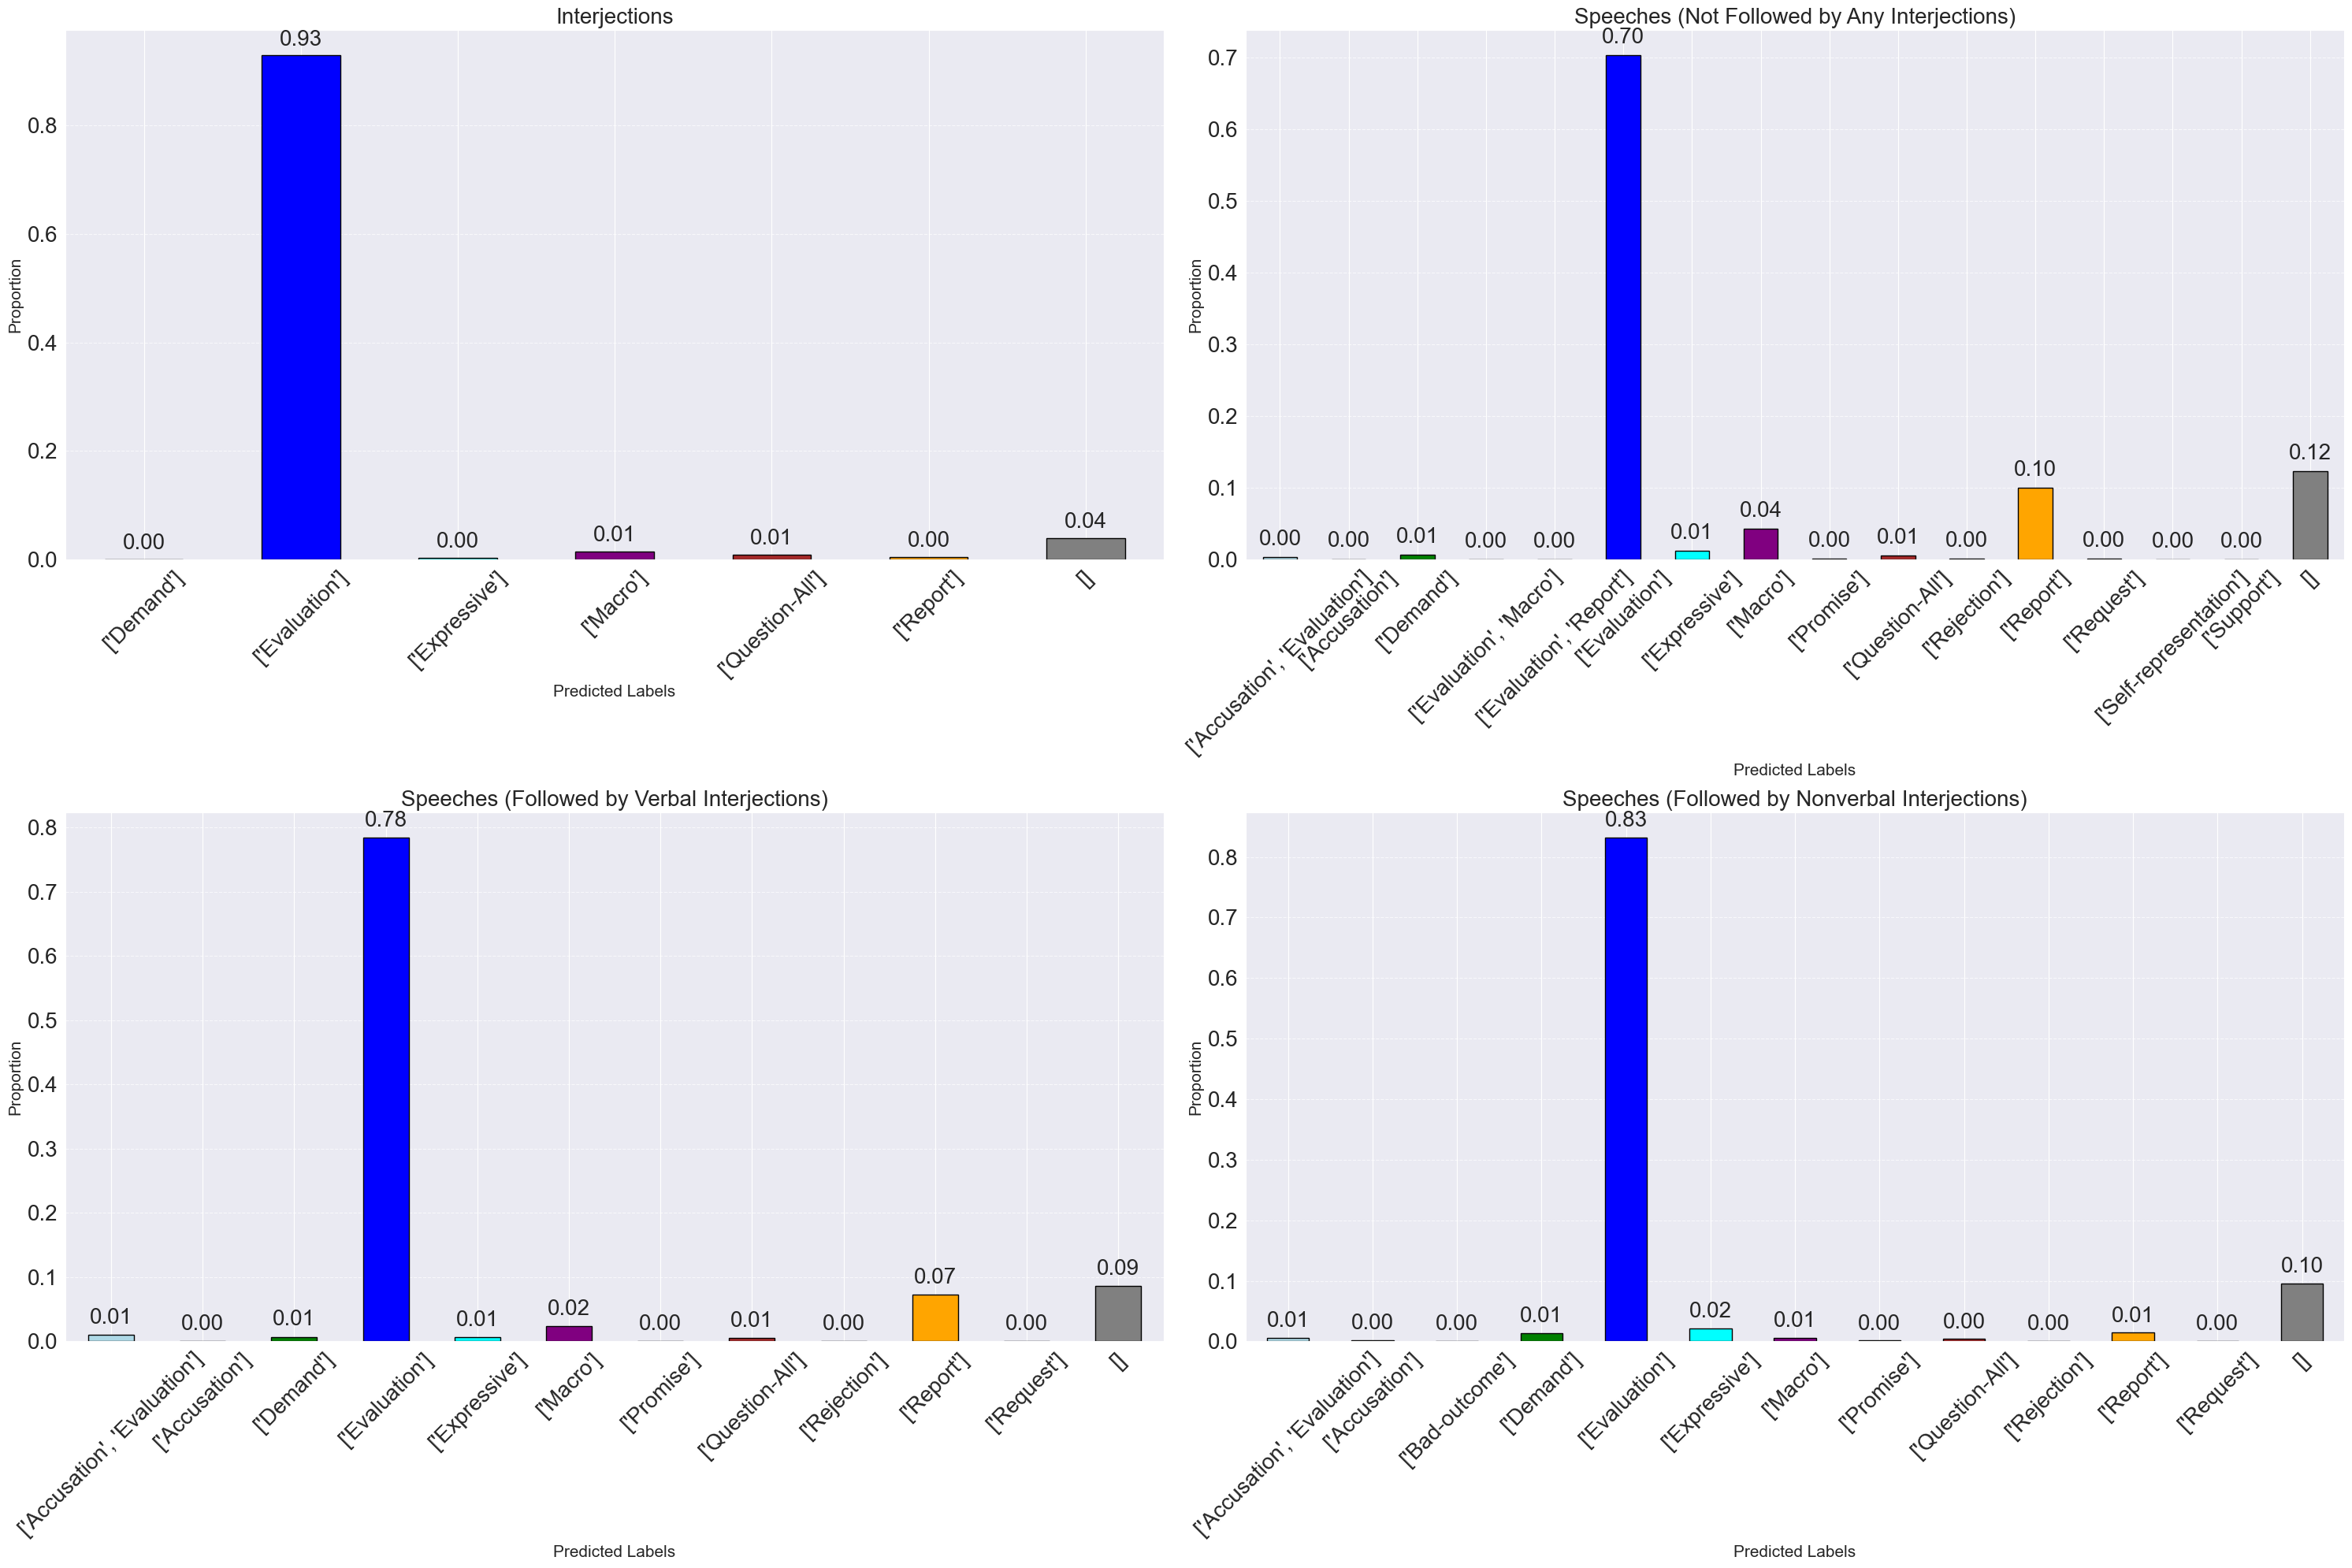

In [363]:
color_map = {
    "['Accusation']": 'red',
    "['Accusation', 'Evaluation']": 'lightblue',
    "['Evaluation', 'Macro']": 'yellow',
    "['Evaluation', 'Report']": 'lightgreen',
    "['Evaluation']": 'blue',
    "['Demand']": 'green',
    "['Macro']": 'purple',
    "['Report']": 'orange',
    "['Expressive']": 'cyan',
    "['Promise']": 'pink',
    "['Question-All']": 'brown',
    "['Request']": 'teal',
    "['Self-representation']": 'gold',
    "['Support']": 'magenta',
}

def label_statistics(dataframe, ax):
    label_counts = dataframe.groupby('predicted_labels').size()
    label_counts_normalized = label_counts / label_counts.sum()

    print(ax, label_counts_normalized)
    colors = [color_map.get(str(label), 'gray') for label in label_counts.index]

    bars = label_counts_normalized.plot(kind='bar', color=colors, edgecolor='black', ax=ax)

    for i, normalized_count in enumerate(label_counts_normalized):
        ax.text(i, normalized_count + 0.01,
                f"{normalized_count:.2f}", ha='center', va='bottom', fontsize=20)

    ax.set_title('Normalized Predicted Labels Count', fontsize=20)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('Proportion', fontsize=15)
    ax.tick_params(axis='x', rotation=45, labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig, axes = plt.subplots(2, 2, figsize=(30, 20))

label_statistics(results_interjections, axes[0, 0])
axes[0, 0].set_title('Interjections', fontsize=20)

label_statistics(speeches_not_followed_interjections, axes[0, 1])
axes[0, 1].set_title('Speeches (Not Followed by Any Interjections)', fontsize=20)

label_statistics(speeches_followed_verbal_interjections, axes[1, 0])
axes[1, 0].set_title('Speeches (Followed by Verbal Interjections)', fontsize=20)

label_statistics(speeches_followed_nonverbal_interjections, axes[1, 1])
axes[1, 1].set_title('Speeches (Followed by Nonverbal Interjections)', fontsize=20)

plt.tight_layout()
plt.show()


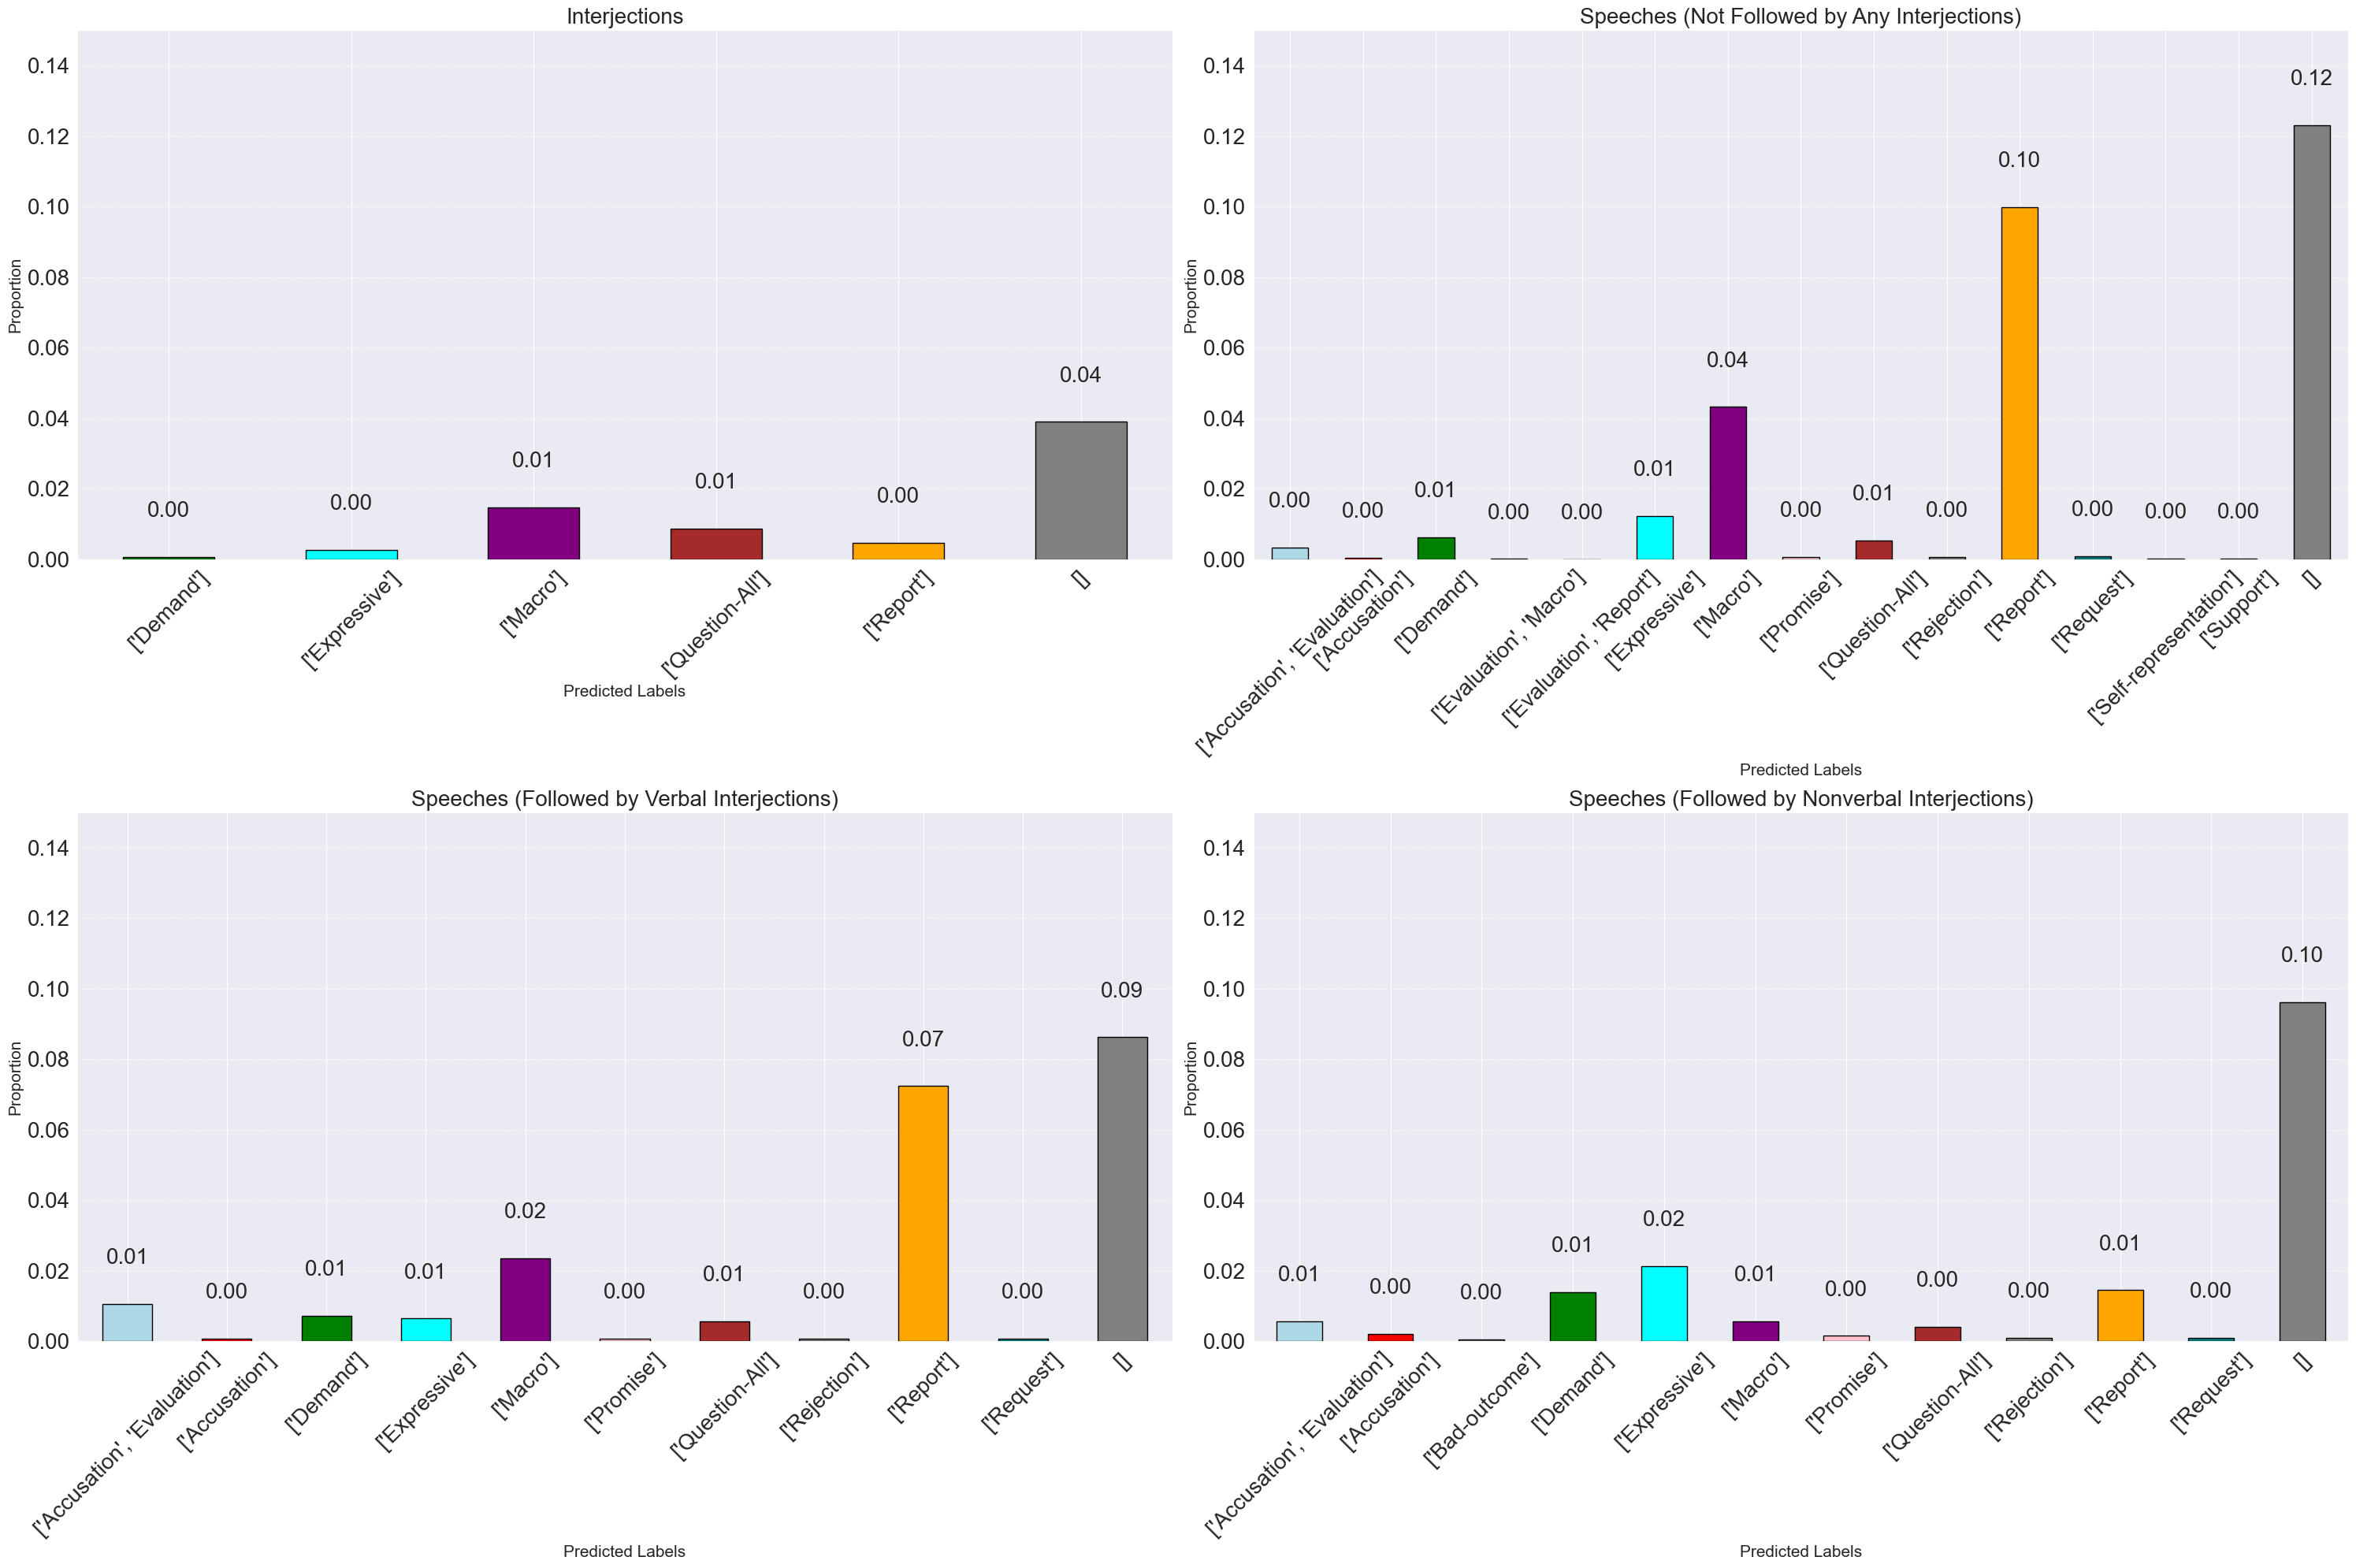

In [367]:
def label_statistics_without_evaluation(dataframe, ax):
    label_counts = dataframe.groupby('predicted_labels').size()
    label_counts_normalized = label_counts / label_counts.sum()

    label_counts_normalized = label_counts_normalized[label_counts_normalized.index != "['Evaluation']"]

    colors = [color_map.get(str(label), 'gray') for label in label_counts_normalized.index]

    bars = label_counts_normalized.plot(kind='bar', color=colors, edgecolor='black', ax=ax)

    for i, normalized_count in enumerate(label_counts_normalized):
        ax.text(i, normalized_count + 0.01,
                f"{normalized_count:.2f}", ha='center', va='bottom', fontsize=20)

    ax.set_title('Normalized Predicted Labels Count', fontsize=20)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('Proportion', fontsize=15)
    ax.tick_params(axis='x', rotation=45, labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig, axes = plt.subplots(2, 2, figsize=(30, 20))

label_statistics_without_evaluation(results_interjections, axes[0, 0])
axes[0, 0].set_title('Interjections', fontsize=20)

label_statistics_without_evaluation(speeches_not_followed_interjections, axes[0, 1])
axes[0, 1].set_title('Speeches (Not Followed by Any Interjections)', fontsize=20)

label_statistics_without_evaluation(speeches_followed_verbal_interjections, axes[1, 0])
axes[1, 0].set_title('Speeches (Followed by Verbal Interjections)', fontsize=20)

label_statistics_without_evaluation(speeches_followed_nonverbal_interjections, axes[1, 1])
axes[1, 1].set_title('Speeches (Followed by Nonverbal Interjections)', fontsize=20)


for ax in axes.flatten():
    ax.set_ylim(0, 0.15)


plt.tight_layout()
plt.show()


In [181]:
filtered_speeches = results_speeches[results_speeches['predicted_labels'] == "['Evaluation']"]

sampled_speeches = filtered_speeches.sample(n=100, random_state=4)

In [182]:
sampled_speeches

utterance_token_list  \
14033  ['Ich', 'finde', 'es', 'auch', 'gut', ',', 'da...   
8315   ['Da', 'ist', 'eine', 'Region', 'gewissermaßen...   
5984   ['CO2', 'ist', 'nicht', '–', 'ich', 'wiederhol...   
2799   ['Die', 'notwendige', 'Sicherheit', 'kann', 'm...   
9617   ['Deutschland', 'soll', 'als', 'Verschlüsselun...   
...                                                  ...   
5965   ['Sie', 'haben', 'einen', 'richtig', 'schönen'...   
1186   ['200', '000', 'und', 'mehr', 'Jugendliche', '...   
1150   ['von', 'hanebüchenen', 'Anschuldigungen', 'un...   
8774   ['Das', 'bedarf', 'unbedingt', 'einer', 'weite...   
13178  ['Ein', 'Paradigmenwechsel', 'war', 'die', 'Er...   

                                               Sentences predicted_labels  \
14033     Ich finde es auch gut, dass es ihn nicht gibt;   ['Evaluation']   
8315   Da ist eine Region gewissermaßen umzingelt von...   ['Evaluation']   
5984   CO2 ist nicht – ich wiederhole seine Worte – d...   ['Evaluation']   
2799   Die notwendige Sicherheit kann man einfacher, ...   ['Evaluation']   
9617   Deutschland soll als Verschlüsselungsstandort ...   ['Evaluation']   
...                                                  ...              ...   
5965       Sie haben einen richtig schönen roten Lappen.   ['Evaluation']   
1186   200 000 und mehr Jugendliche, die jedes Jahr i...   ['Evaluation']   
1150   von hanebüchenen Anschuldigungen und Diskredit...   ['Evaluation']   
8774   Das bedarf unbedingt einer weiteren Veränderun...   ['Evaluation']   
13178  Ein Paradigmenwechsel war die Erstreckung der ...   ['Evaluation']   

                confidences  next_verbal_interjection  \
14033  [0.9756952524185181]                     False   
8315   [0.8300830721855164]                     False   
5984   [0.9125890731811523]                     False   
2799   [0.9509698748588562]                     False   
9617   [0.9201720952987671]                     False   
...                     ...                       ...   
5965   [0.9637314677238464]                     False   
1186   [0.9510090351104736]                     False   
1150   [0.9223114252090454]                      True   
8774   [0.9202793836593628]                     False   
13178  [0.9157841801643372]                     False   

       next_nonverbal_interjection                        Speaker    Gender  \
14033                        False                   Jürgen Hardt  männlich   
8315                         False  Marie-Agnes Strack-Zimmermann  weiblich   
5984                         False                  Karsten Hilse  männlich   
2799                         False                    Peter Heidt  männlich   
9617                         False                   Tabea Rößner  weiblich   
...                            ...                            ...       ...   
5965                         False                  Karsten Hilse  männlich   
1186                         False                  Yasmin Fahimi  weiblich   
1150                         False                  Nicole Höchst  weiblich   
8774                         False                   Lothar Maier  männlich   
13178                        False                     Karin Maag  weiblich   

         Party       Filename  
14033  CDU/CSU  BT_19_238.xml  
8315       FDP  BT_19_236.xml  
5984       AfD  BT_19_236.xml  
2799       FDP  BT_19_235.xml  
9617    GRUENE  BT_19_237.xml  
...        ...            ...  
5965       AfD  BT_19_236.xml  
1186       SPD  BT_19_235.xml  
1150       AfD  BT_19_235.xml  
8774       AfD  BT_19_236.xml  
13178  CDU/CSU  BT_19_237.xml  

[100 rows x 10 columns]

In [183]:
sampled_speeches.to_csv('annotations/evaluation_annotation_speech.csv', sep=';', index=False)

In [184]:
nothing_speech = results_speeches[results_speeches['predicted_labels'] == "[]"]
sampled_nothing_speech = nothing_speech.sample(n=100, random_state=4)
sampled_nothing_speech.to_csv('annotations/nothing_annotation_speech.csv', sep=';', index=False)

In [156]:
class_speech = results_speeches[
    (results_speeches['predicted_labels'] != "[]") &
    (results_speeches['predicted_labels'] != "['Evaluation']")
]

In [185]:
sampled_class_speech = class_speech.groupby("predicted_labels", group_keys=False).apply(
    lambda x: x.sample(n=min(len(x), 10), random_state=4)
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_4964\2851679135.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_class_speech = class_speech.groupby("predicted_labels", group_keys=False).apply(


In [186]:
sampled_class_speech.to_csv('annotations/class_annotation_speech.csv', sep=';', index=False)

In [136]:
filtered_interjections = results_interjections[results_interjections['predicted_labels'] == "['Evaluation']"]

sampled_interjections = filtered_interjections.sample(n=50, random_state=4)

In [140]:
not_eval = results_interjections[results_interjections['predicted_labels'] != "['Evaluation']"]

In [141]:
not_eval

utterance_token_list  \
0     ['Gut', ',', 'dass', 'das', 'die', 'letzte', '...   
21            ['Die', 'Zeit', 'ist', 'abgelaufen', '!']   
46           ['Alternative', 'für', 'Deutschland', '?']   
48                ['Reden', 'Sie', 'zum', 'Thema', '!']   
60                         ['Gott', 'sei', 'Dank', '!']   
...                                                 ...   
1399  ['Aber', 'wir', 'würden', 'ihm', 'noch', 'Rede...   
1423                                    ['Bis', '2060']   
1431  ['Warum', 'ist', 'er', 'dann', 'nicht', 'im', ...   
1468                                              ['3']   
1481                         ['Danke', ',', 'SPD', '!']   

                                              Paragraph predicted_labels  \
0                    Gut, dass das die letzte Rede ist!        ['Macro']   
21                             Die Zeit ist abgelaufen!        ['Macro']   
46    Alternative für Deutschland? Schrecken für Deu...               []   
48    Reden Sie zum Thema! Was hat denn das mit dem ...               []   
60                                       Gott sei Dank!               []   
...                                                 ...              ...   
1399           Aber wir würden ihm noch Redezeit geben!        ['Macro']   
1423                                          Bis 2060!               []   
1431          Warum ist er dann nicht im Kompetenzteam?               []   
1468                                  3 G ist Lockdown!               []   
1481                                        Danke, SPD!               []   

               confidences              Speaker    Gender    Party  \
0     [0.7225063443183899]  Armin-Paulus Hampel  männlich      AfD   
21     [0.827701210975647]      Albrecht Glaser  männlich      AfD   
46                      []        Nicole Höchst  weiblich      AfD   
48                      []        Nicole Höchst  weiblich      AfD   
60                      []           Kai Wegner  männlich  CDU/CSU   
...                    ...                  ...       ...      ...   
1399  [0.9590740203857422]   Alexander Dobrindt  männlich  CDU/CSU   
1423                    []   Alexander Dobrindt  männlich  CDU/CSU   
1431                    []         Paul Ziemiak  männlich  CDU/CSU   
1468                    []      Stephan Stracke  männlich  CDU/CSU   
1481                    []         Andreas Jung  männlich  CDU/CSU   

             Interjector Interjector Party Interjector Gender       Filename  
0       Britta Haßelmann            GRUENE           weiblich  BT_19_235.xml  
21      Britta Haßelmann            GRUENE           weiblich  BT_19_235.xml  
46     Marianne Schieder               SPD           weiblich  BT_19_235.xml  
48     Dr. Karamba Diaby               SPD           männlich  BT_19_235.xml  
60     Marianne Schieder               SPD           weiblich  BT_19_235.xml  
...                  ...               ...                ...            ...  
1399      Christian Dürr               FDP           männlich  BT_19_239.xml  
1423    Peter Boehringer               AfD           männlich  BT_19_239.xml  
1431   Carsten Schneider               SPD           männlich  BT_19_239.xml  
1468  Beatrix von Storch               AfD           weiblich  BT_19_239.xml  
1481         René Röspel               SPD           männlich  BT_19_239.xml  

[105 rows x 11 columns]

In [137]:
sampled_interjections

utterance_token_list  \
623   ['Da', 'klatschen', 'nicht', 'die', 'Eigenen',...   
960                      ['Haben', 'wir', 'schon', '!']   
300   ['Kommen', 'Sie', 'von', 'Ihrem', 'BAföG-Traum...   
174   ['Klagen', 'Sie', 'gerade', 'die', 'gescheiter...   
43                  ['Unverschämte', 'Behauptung', '!']   
...                                                 ...   
1277  ['Das', 'ist', 'doch', 'ein', 'Scheinargument'...   
508            ['Doch', ',', 'Schleswig-Holstein', '!']   
544   ['Wenn', 'Ihnen', 'kein', 'anderer', 'groß', '...   
603    ['Sie', 'haben', 'doch', 'keine', 'Ahnung', '!']   
1093                                ['Wo', 'denn', '?']   

                                              Paragraph predicted_labels  \
623   Da klatschen nicht die Eigenen, nur die AfD! M...   ['Evaluation']   
960                    Haben wir doch! Haben wir schon!   ['Evaluation']   
300           Kommen Sie von Ihrem BAföG-Trauma runter!   ['Evaluation']   
174   Klagen Sie gerade die gescheiterte Zuwanderung...   ['Evaluation']   
43                             Unverschämte Behauptung!   ['Evaluation']   
...                                                 ...              ...   
1277  Wir können doch keine Anträge beschließen! Das...   ['Evaluation']   
508                           Doch, Schleswig-Holstein!   ['Evaluation']   
544   Wenn Ihnen kein anderer groß einfällt für den ...   ['Evaluation']   
603                        Sie haben doch keine Ahnung!   ['Evaluation']   
1093                                           Wo denn?   ['Evaluation']   

               confidences                Speaker    Gender      Party  \
623   [0.9470601677894592]           Diether Dehm  männlich  DIE LINKE   
960   [0.8682399392127991]        Frank Schäffler  männlich        FDP   
300   [0.7860694527626038]     Tankred Schipanski  männlich    CDU/CSU   
174   [0.6456600427627563]         Andreas Rimkus  männlich        SPD   
43    [0.9335219860076904]          Renate Künast  weiblich     GRUENE   
...                    ...                    ...       ...        ...   
1277   [0.878904402256012]  Michael Grosse-Brömer  männlich    CDU/CSU   
508   [0.9450414776802063]   Maria Klein-Schmeink  weiblich     GRUENE   
544   [0.9488856196403503]       Stephan Brandner  männlich        AfD   
603   [0.9423300623893738]           Ulle Schauws  weiblich     GRUENE   
1093  [0.8482810258865356]       Britta Haßelmann  weiblich     GRUENE   

                            Interjector Interjector Party Interjector Gender  \
623              Dr. Franziska Brantner            GRUENE           weiblich   
960                    Cansel Kiziltepe               SPD           weiblich   
300                         Kai Gehring            GRUENE           männlich   
174                      Christian Dürr               FDP           männlich   
43                     Dr. Rainer Kraft               AfD           männlich   
...                                 ...               ...                ...   
1277                Dr. Marco Buschmann               FDP           männlich   
508                  Dr. Andrew Ullmann               FDP           männlich   
544              Dr. Franziska Brantner            GRUENE           weiblich   
603                             Unknown               AfD                NaN   
1093  Dr. Marie-Agnes Strack-Zimmermann               FDP           weiblich   

           Filename  
623   BT_19_236.xml  
960   BT_19_237.xml  
300   BT_19_236.xml  
174   BT_19_236.xml  
43    BT_19_235.xml  
...             ...  
1277  BT_19_239.xml  
508   BT_19_236.xml  
544   BT_19_236.xml  
603   BT_19_236.xml  
1093  BT_19_238.xml  

[100 rows x 11 columns]

In [139]:
sampled_interjections.to_csv('annotations/evaluation_annotation_interjection.csv', sep=';', index=False)

In [153]:
nothing_interjection = results_interjections[results_interjections['predicted_labels'] == "[]"]
nothing_interjection.to_csv('annotations/nothing_annotation_interjection.csv', sep=';', index=False)

In [180]:
nothing_interjection

utterance_token_list  \
46           ['Alternative', 'für', 'Deutschland', '?']   
48                ['Reden', 'Sie', 'zum', 'Thema', '!']   
60                         ['Gott', 'sei', 'Dank', '!']   
91         ['Was', 'ist', 'mit', 'den', 'Müttern', '?']   
116   ['Warum', 'dann', 'keine', 'Gegenüberstellung'...   
161   ['Ihre', 'Einschätzung', 'zum', 'Merkel-Nachfo...   
244                                        ['Schreien']   
250   ['Was', 'ist', 'mit', 'dem', 'Kohleausstieg', ...   
266   ['Nennen', 'Sie', 'doch', 'mal', 'genaue', 'Za...   
285   ['Haben', 'die', 'Verträge', 'mit', 'dem', 'BM...   
310                                ['Unbefristet', '!']   
314   ['Der', 'Bundesdurchschnitt', 'liegt', 'bei', ...   
332                         ['-Timon', 'Gremmels', '[']   
394   ['65', 'Prozent', 'haben', 'die', 'Grünen', 'g...   
410                                     ['Corona', '!']   
438                          ['„', 'Heilung', '“', '?']   
466          ['Hätten', 'Sie', 'doch', 'zugehört', '!']   
486                                           ['Lesen']   
488                                           ['Lesen']   
535   ['Ist', 'die', 'Zeit', 'noch', 'nicht', 'vorbe...   
540                                     ['Jawohl', '!']   
542                                ['Für', 'alle', '?']   
618                  ['Die', 'AfD', 'applaudiert', '!']   
626   ['Sind', 'das', 'die', 'Nachwirkungen', 'vom',...   
630         ['Der', 'war', 'bei', 'den', 'Grünen', '!']   
670   ['Ich', 'schenke', 'Ihnen', 'zum', 'Abschied',...   
671   ['Einschränkung', 'der', 'Meinungsfreiheit', '?']   
677                        ['Um', 'diese', 'Zeit', '?']   
731               ['Und', 'wer', 'war', 'dagegen', '?']   
738                              ['Abgeschrieben', '!']   
742                           ['„', 'Leider', '“', '?']   
743                        ['Gott', 'sei', 'Dank', '!']   
760   ['Sie', 'doch', 'einfach', 'mal', 'zum', 'Them...   
778                              ['Und', 'tschüs', '!']   
840                                     ['Jawohl', '!']   
918              ['Amtierende', 'SPD-Abgeordnete', '!']   
925   ['Wo', 'ist', 'eigentlich', 'Peter', 'Altmaier...   
930   ['Ist', 'Andi', 'Scheuer', 'eigentlich', 'noch...   
1009                         ['„', 'Genosse', '“', '?']   
1067                          ['War', 'das', 'so', '?']   
1074  ['Warum', 'haben', 'Sie', 'sich', 'dann', 'per...   
1082  ['Warum', 'haben', 'Sie', 'dann', 'gegen', 'da...   
1151  ['Herr', 'Scholz', 'ist', 'schon', 'wieder', '...   
1175                             ['Wahlkampfrede', '!']   
1204                                           ['Herr']   
1219                              ['6', 'Prozent', '!']   
1240                       ['Ganz', 'weit', 'weg', ';']   
1244                            ['Und', 'tschüss', '!']   
1283  ['Schöne', 'Grüße', 'an', 'Andi', 'Scheuer', '!']   
1313                 ['Auf', 'welcher', 'Strecke', '?']   
1314    ['Wenn', 'die', 'Menschen', 'tot', 'sind', '?']   
1337                   ['Mit', 'langem', '„', 'U', '“']   
1348                                    ['Vergleichen']   
1394                                           ['Herr']   
1423                                    ['Bis', '2060']   
1431  ['Warum', 'ist', 'er', 'dann', 'nicht', 'im', ...   
1468                                              ['3']   
1481                         ['Danke', ',', 'SPD', '!']   

                                              Paragraph predicted_labels  \
46    Alternative für Deutschland? Schrecken für Deu...               []   
48    Reden Sie zum Thema! Was hat denn das mit dem ...               []   
60                                       Gott sei Dank!               []   
91                             Was ist mit den Müttern?               []   
116                 Warum dann keine Gegenüberstellung?               []   
161   Ihre Einschätzung zum Merkel-Nachfolger war gu...               []   
244                  

In [178]:
class_interjection = results_interjections[
    (results_interjections['predicted_labels'] != "[]") &
    (results_interjections['predicted_labels'] != "['Evaluation']")
]
class_interjection.to_csv('annotations/class_annotation_interjection.csv', sep=';', index=False)

In [179]:
class_interjection

utterance_token_list  \
0     ['Gut', ',', 'dass', 'das', 'die', 'letzte', '...   
21            ['Die', 'Zeit', 'ist', 'abgelaufen', '!']   
82                    ['Nach', 'Ihrer', 'Rede', 'muss']   
101               ['Jetzt', 'mal', 'zum', 'Thema', '!']   
110                                           ['Reden']   
127                                        ['Was', '?']   
249                                    ['Alleine', '?']   
333                                   ['SPD', ']', ':']   
405   ['Wie', 'teuer', 'wird', 'die', 'Solarpflicht'...   
456                                        ['Was', '?']   
551                                        ['Was', '?']   
615   ['In', 'Myanmar', 'gibt', 'es', 'auch', 'Tote'...   
640   ['Mann', ',', 'Christoph', ',', 'hör', 'doch',...   
673                         ['Auf', 'Wiedersehen', '!']   
674                                     ['Tschüs', '!']   
687                                           ['Reden']   
696                             ['Rede', 'halten', '!']   
715                                           ['Reden']   
744                                        ['Was', '?']   
746                                      ['Danke', '!']   
759                                           ['Reden']   
764      ['Zum', 'Thema', ',', 'Herr', 'Movassat', '!']   
805                               ['Gegen', 'wen', '?']   
817   ['Sie', 'hat', 'übers', 'Umsetzen', 'gesproche...   
923   ['-Zuruf', 'von', 'der', 'SPD', ':', 'Hört', '!']   
954                                        ['Was', '?']   
982   ['Das', 'war', 'eine', 'öffentliche', 'Anhörun...   
985                           ['Ich', 'war', 'da', '!']   
1061                                        ['Stimmen']   
1090  ['Ich', 'kann', 'auch', 'noch', 'eine', 'Frage...   
1094                                     ['Danke', '!']   
1099                       ['Welche', 'Regierung', '?']   
1159                                       ['Was', '?']   
1162             ['Wo', 'ist', 'er', 'eigentlich', '?']   
1173                                   ['Zuhören', '!']   
1187                                       ['Was', '?']   
1266            ['Es', 'liegen', 'Anträge', 'vor', '!']   
1273            ['Es', 'liegen', 'Anträge', 'vor', '!']   
1298                              ['Zum', 'Thema', '!']   
1299                                          ['Reden']   
1301                                   ['zur', 'Sache']   
1335                                       ['Was', '?']   
1372  ['Wir', 'haben', 'beim', 'letzten', 'Mal', '90...   
1374                                     ['Frage', '!']   
1375                                     ['Frage', '!']   
1377  ['So', ',', 'Herr', 'Laschet', ',', 'jetzt', '...   
1399  ['Aber', 'wir', 'würden', 'ihm', 'noch', 'Rede...   

                                              Paragraph  predicted_labels  \
0                    Gut, dass das die letzte Rede ist!         ['Macro']   
21                             Die Zeit ist abgelaufen!         ['Macro']   
82    Also was war jetzt der Fehler? Nach Ihrer Rede...         ['Macro']   
101                                Jetzt mal zum Thema!         ['Macro']   
110                                Reden Sie über sich?         ['Macro']   
127                                                Was?  ['Question-All']   
249                                            Alleine?  ['Question-All']   
333   Lieber Himmel! -Timon Gremmels [SPD]: So ein B...         ['Macro']   
405   Wie teuer würden die denn? Mach doch einmal ei...  ['Question-All']   
456                                                Was?  ['Question-All']   
551                                                Was?  ['Question-All']   
615                       In Myanmar gibt es auch Tote!        ['Report']   
640   Sagen wir auch nicht! Mann, Christoph, hör doc...        ['Demand']   
673                            Auf Wiedersehen! Tschüs!    ['Expressive']   
674                            Auf Wiedersehen!

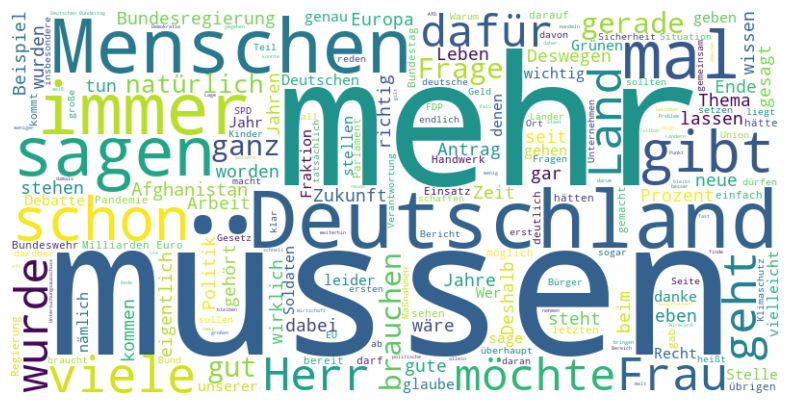

In [338]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

### Speeches NOT followed by any interjection
text_not_followed = ' '.join(speeches_not_followed_interjections['Sentences'])
additional_stopwords = ["Kollegen", "Kolleginnen", "Liebe", "Präsidentin", "Präsident", "heute", "vielen", "Herren", "ja", "Damen", "Herzlichen", "Dank", "geehrte", "geehrter"]
german_stopwords = set(stopwords.words('german'))
german_stopwords.update(additional_stopwords)


wordcloud = WordCloud(stopwords=german_stopwords, background_color='white', width=800, height=400).generate(text_not_followed)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

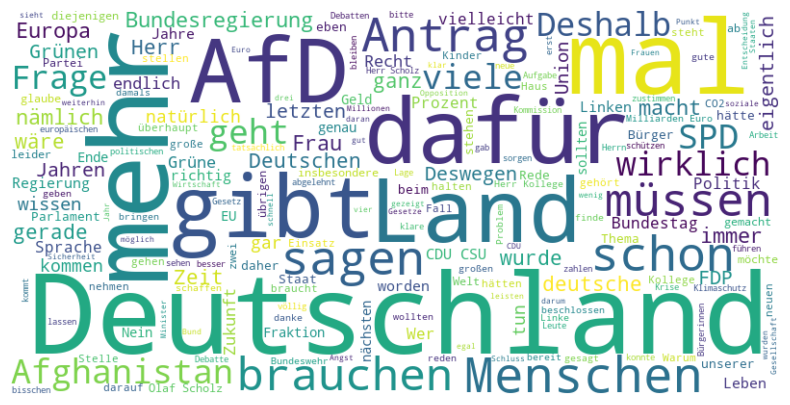

In [289]:
### Speeches followed verbal interjections
text_followed_verbal = ' '.join(speeches_followed_verbal_interjections['Sentences'])
wordcloud = WordCloud(stopwords=german_stopwords, background_color='white', width=800, height=400).generate(text_followed_verbal)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

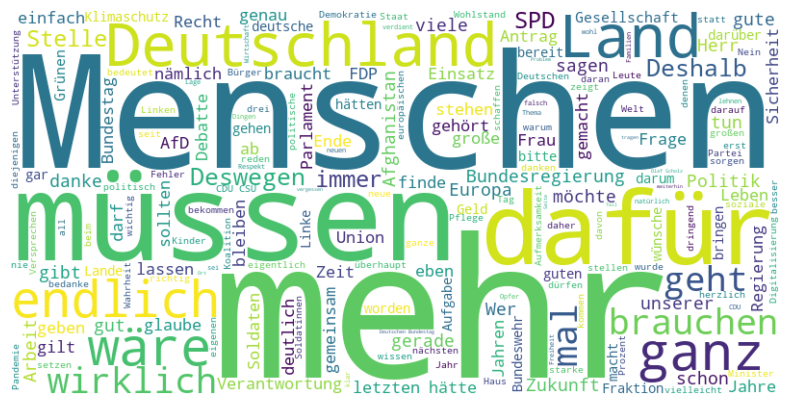

In [290]:
### Speeches followed nonverbal interjections
text_followed_nonverbal  = ' '.join(speeches_followed_nonverbal_interjections['Sentences'])

german_stopwords = set(stopwords.words('german'))
german_stopwords.update(additional_stopwords)

wordcloud = WordCloud(stopwords=german_stopwords, background_color='white', width=800, height=400).generate(text_followed_nonverbal)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

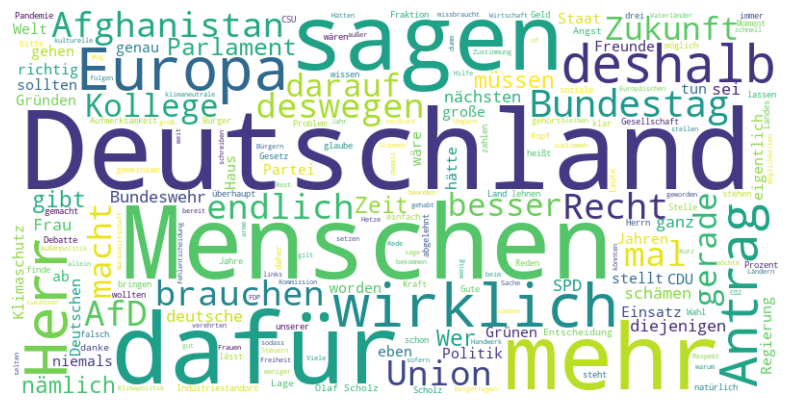

In [291]:
### Speeches followed nonverbal and verbal interjections
text_followed_both = ' '.join(speeches_followed_both['Sentences'])
wordcloud = WordCloud(stopwords=german_stopwords, background_color='white', width=800, height=400).generate(text_followed_both)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [377]:
from sklearn.feature_extraction.text import TfidfVectorizer

german_stopwords = set(stopwords.words('german'))
german_stopwords.update({"Kollegen", "Kolleginnen", "Liebe", "Präsidentin", "Präsident", "Lieber", "Herren", "ja", "Damen", "geehrte", "geehrter"})
custom_stopwords = list(map(str.lower, german_stopwords))

def get_top_n_tfidf_words(text, n=50):
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords)
    X = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    scores = X.sum(axis=0).A1
    word_score = dict(zip(feature_names, scores))
    sorted_word_score = sorted(word_score.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_score[:n]

top_50_followed_both = get_top_n_tfidf_words(text_followed_both, n=50)
top_50_followed_nonverbal = get_top_n_tfidf_words(text_followed_nonverbal, n=50)
top_50_followed_verbal = get_top_n_tfidf_words(text_followed_verbal, n=50)
top_50_not_followed = get_top_n_tfidf_words(text_not_followed, n=50)


set_followed_both = set(word for word, _ in top_50_followed_both)
set_followed_nonverbal = set(word for word, _ in top_50_followed_nonverbal)
set_followed_verbal = set(word for word, _ in top_50_followed_verbal)
set_not_followed = set(word for word, _ in top_50_not_followed)



unique_followed_both = set_followed_both - (set_followed_nonverbal | set_followed_verbal | set_not_followed)
unique_followed_nonverbal = set_followed_nonverbal - (set_followed_both | set_followed_verbal | set_not_followed)
unique_followed_verbal = set_followed_verbal - (set_followed_both | set_followed_nonverbal | set_not_followed)
unique_not_followed = set_not_followed - (set_followed_both | set_followed_nonverbal | set_followed_verbal)

diff_followed_not_followed = (set_followed_nonverbal | set_followed_verbal) - set_not_followed
diff_not_followed_followed =  set_not_followed - (set_followed_nonverbal | set_followed_verbal)


print(f"Top 50 words in Followed Both: {top_50_followed_both}")
print(f"Top 50 words in Followed Nonverbal: {top_50_followed_nonverbal}")
print(f"Top 50 words in Followed Verbal: {top_50_followed_verbal}")
print(f"Top 50 words in Not Followed: {top_50_not_followed}")

print("\nUnique Words:")
print(f"Unique to Followed Both: {unique_followed_both}")
print(f"Unique to Followed Nonverbal: {unique_followed_nonverbal}")
print(f"Unique to Followed Verbal: {unique_followed_verbal}")
print(f"Unique to Not Followed: {unique_not_followed}")

print("\nDifferences:")
print(f"Words in texts followed by interjection that are NOT in texts not followed by any interjections: {diff_followed_not_followed}")
print(f"Words in texts not followed by interjection that are NOT in texts followed by interjections: {diff_not_followed_followed }")

Top 50 words in Followed Both: [('deutschland', 0.18834646603491703), ('menschen', 0.1593700866449298), ('dafür', 0.14488189694993617), ('mehr', 0.13039370725494256), ('sagen', 0.13039370725494256), ('antrag', 0.11590551755994895), ('bundestag', 0.11590551755994895), ('deshalb', 0.11590551755994895), ('europa', 0.11590551755994895), ('herr', 0.11590551755994895), ('heute', 0.11590551755994895), ('wirklich', 0.11590551755994895), ('afd', 0.10141732786495533), ('afghanistan', 0.10141732786495533), ('brauchen', 0.10141732786495533), ('deswegen', 0.10141732786495533), ('endlich', 0.10141732786495533), ('mal', 0.10141732786495533), ('scholz', 0.10141732786495533), ('union', 0.10141732786495533), ('besser', 0.0869291381699617), ('darauf', 0.0869291381699617), ('gerade', 0.0869291381699617), ('kollege', 0.0869291381699617), ('macht', 0.0869291381699617), ('parlament', 0.0869291381699617), ('recht', 0.0869291381699617), ('zukunft', 0.0869291381699617), ('bundeswehr', 0.07244094847496808), ('da

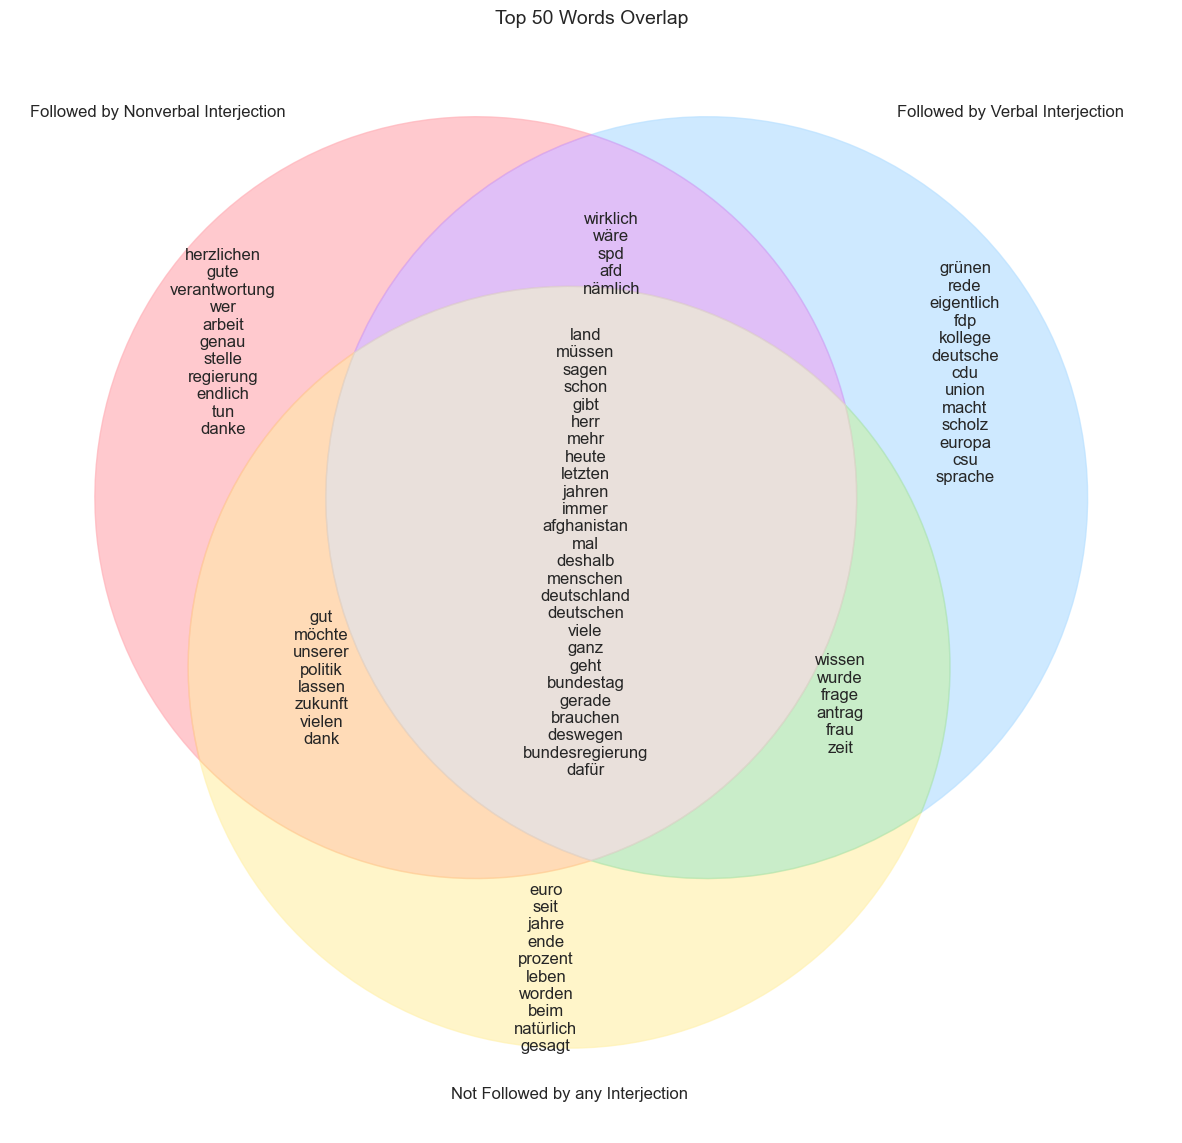

In [378]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

venn = venn3([set_followed_nonverbal, set_followed_verbal, set_not_followed],
             set_labels=('Followed by Nonverbal Interjection',
                         'Followed by Verbal Interjection',
                         'Not Followed by any Interjection'))

venn.get_patch_by_id('100').set_color('#ffb3ba')
venn.get_patch_by_id('010').set_color('#bae1ff')
venn.get_patch_by_id('001').set_color('#fff2b3')
venn.get_patch_by_id('110').set_color('#d4a5f4')
venn.get_patch_by_id('101').set_color('#ffcc99')
venn.get_patch_by_id('011').set_color('#b3e6b3')
venn.get_patch_by_id('111').set_color('#e0d4cc')

for patch in venn.patches:
    if patch:
        patch.set_alpha(0.7)

for label_id in ['100', '010', '001', '110', '101', '011', '111']:
    label = venn.get_label_by_id(label_id)
    if label:
        label.set_fontsize(12)  # Increase font size of numbers inside circles

venn.get_label_by_id('100').set_text("\n".join(set_followed_nonverbal - set_followed_verbal - set_not_followed))
venn.get_label_by_id('010').set_text("\n".join(set_followed_verbal - set_followed_nonverbal - set_not_followed))
venn.get_label_by_id('001').set_text("\n".join(set_not_followed - set_followed_nonverbal - set_followed_verbal))
venn.get_label_by_id('110').set_text("\n".join(set_followed_nonverbal & set_followed_verbal - set_not_followed))
venn.get_label_by_id('101').set_text("\n".join(set_followed_nonverbal & set_not_followed - set_followed_verbal))
venn.get_label_by_id('011').set_text("\n".join(set_followed_verbal & set_not_followed - set_followed_nonverbal))
venn.get_label_by_id('111').set_text("\n".join(set_followed_nonverbal & set_followed_verbal & set_not_followed))

plt.title("Top 50 Words Overlap", fontsize=14)
plt.show()


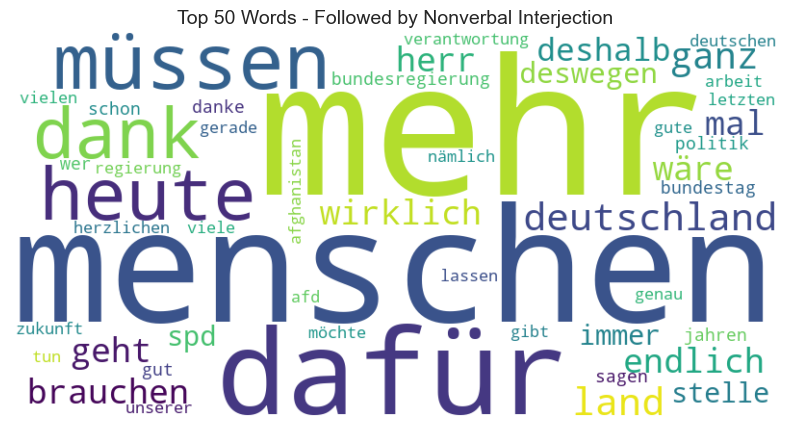

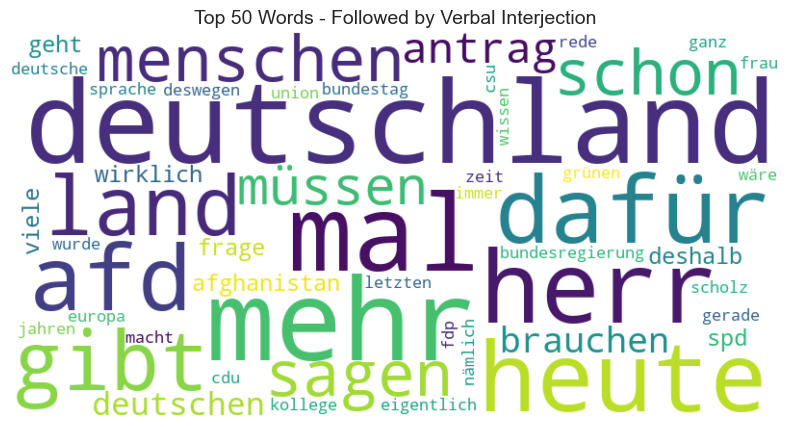

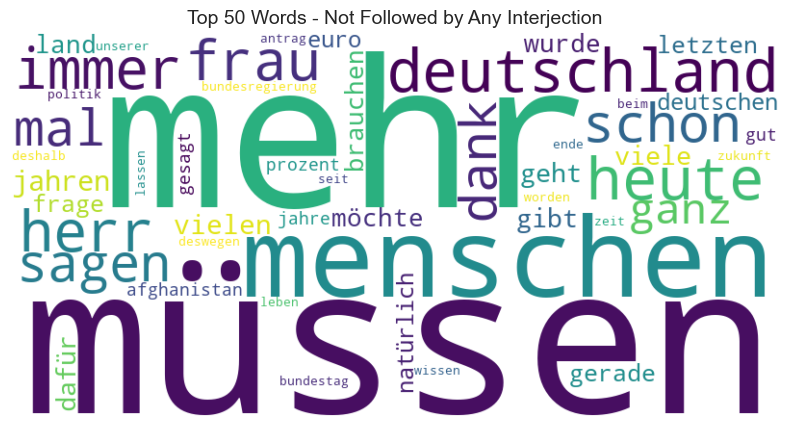

In [357]:
def generate_wordcloud(word_scores, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_scores)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

word_scores_nonverbal = dict(top_50_followed_nonverbal)
word_scores_verbal = dict(top_50_followed_verbal)
word_scores_not_followed = dict(top_50_not_followed)

generate_wordcloud(word_scores_nonverbal, "Top 50 Words - Followed by Nonverbal Interjection")
generate_wordcloud(word_scores_verbal, "Top 50 Words - Followed by Verbal Interjection")
generate_wordcloud(word_scores_not_followed, "Top 50 Words - Not Followed by Any Interjection")


In [382]:
word_scores_nonverbal

{'mehr': 0.22316594080923863,
 'menschen': 0.19618983807405593,
 'dafür': 0.19373746509813022,
 'müssen': 0.19373746509813022,
 'heute': 0.16921373533887324,
 'dank': 0.15940424343517043,
 'deutschland': 0.15695187045924475,
 'land': 0.15695187045924475,
 'ganz': 0.14469000557961625,
 'endlich': 0.12016627582035926,
 'wäre': 0.12016627582035926,
 'geht': 0.11771390284443356,
 'herr': 0.11771390284443356,
 'wirklich': 0.11771390284443356,
 'brauchen': 0.11526152986850785,
 'mal': 0.11280915689258215,
 'deshalb': 0.10299966498887936,
 'deswegen': 0.10299966498887936,
 'immer': 0.09809491903702797,
 'spd': 0.09809491903702797,
 'stelle': 0.09809491903702797,
 'bundesregierung': 0.09319017308517656,
 'wer': 0.09073780010925087,
 'danke': 0.08828542713332517,
 'sagen': 0.08828542713332517,
 'jahren': 0.08583305415739946,
 'politik': 0.08583305415739946,
 'bundestag': 0.08338068118147376,
 'gut': 0.08338068118147376,
 'schon': 0.08092830820554807,
 'arbeit': 0.07602356225369668,
 'gute': 0.0

In [329]:
import re

parties = [
    "LINKE", "LINKEN", "DIE LINKE", "CDU/CSU", "BÜNDNIS 90/DIE GRÜNEN", "BÜNDNISSES 90/DIE GRÜNEN",
    'BÜNDIS 90/Die Grünen', 'BÜNDIS 90/DIE GRÜNEN', "SPD", "FDP", "AfD", "Die PARTEI", "die Grünen", "Sozialdemokraten"
]

pattern = '|'.join([re.escape(term) for term in parties])

party_mentioned = results_speeches[results_speeches['Sentences'].str.contains(pattern, case=False, na=False)]

party_mentioned

utterance_token_list  \
276    ['In', 'Wahrheit', 'ist', 'die', 'Außenpolitik...   
344    ['Ich', 'bin', 'den', 'Koalitionsfraktionen', ...   
411    ['Und', 'ich', 'sage', 'auch', 'sehr', 'deutli...   
437    ['Im', 'Namen', 'der', 'CDU', '/', 'CSU-Bundes...   
497    ['Lieber', 'Herr', 'Matschie', ',', 'ich', 'ka...   
...                                                  ...   
18542  ['Deshalb', 'sind', 'wir', 'als', 'SPD-Bundest...   
18561  ['Um', 'es', 'gleich', 'vorwegzunehmen', ':', ...   
18564  ['Wir', 'als', 'Linke', 'stehen', 'dafür', ','...   
18567  ['Wir', 'brauchen', 'nämlich', 'eine', 'Gemein...   
18582  ['Letztlich', 'waren', 'aber', 'bis', 'auf', '...   

                                               Sentences predicted_labels  \
276    In Wahrheit ist die Außenpolitik Deutschlands ...   ['Evaluation']   
344    Ich bin den Koalitionsfraktionen und insbesond...   ['Expressive']   
411    Und ich sage auch sehr deutlich, insbesondere ...        ['Macro']   
437    Im Namen der CDU/CSU-Bundestagsfraktion danke ...   ['Expressive']   
497    Lieber Herr Matschie, ich kann mich den Worten...   ['Expressive']   
...                                                  ...              ...   
18542  Deshalb sind wir als SPD-Bundestagsfraktion un...   ['Evaluation']   
18561  Um es gleich vorwegzunehmen: Wir als Linke wer...               []   
18564  Wir als Linke stehen dafür, dass alle Kinder g...   ['Evaluation']   
18567  Wir brauchen nämlich eine Gemeinschaftsaufgabe...   ['Evaluation']   
18582  Letztlich waren aber bis auf die AfD wir alle ...               []   

                confidences  next_verbal_interjection  \
276    [0.9779787659645081]                     False   
344    [0.8394610285758972]                     False   
411    [0.5052120089530945]                     False   
437    [0.9313321113586426]                     False   
497    [0.5526474714279175]                     False   
...                     ...                       ...   
18542  [0.9191448092460632]                     False   
18561                    []                     False   
18564  [0.8249764442443848]                     False   
18567  [0.7347428202629089]                     False   
18582                    []                     False   

       next_nonverbal_interjection                Speaker    Gender  \
276                           True       Rüdiger Lucassen  männlich   
344                          False  Johann David Wadephul  männlich   
411                          False           Henning Otte  männlich   
437                          False           Henning Otte  männlich   
497                          False        Gisela Manderla  weiblich   
...                            ...                    ...       ...   
18542                         True             Katja Mast  weiblich   
18561                        False         Gesine Lötzsch  weiblich   
18564                         True         Gesine Lötzsch  weiblich   
18567                        False         Gesine Lötzsch  weiblich   
18582                        False       Britta Haßelmann  weiblich   

           Party       Filename  \
276          AfD  BT_19_235.xml   
344      CDU/CSU  BT_19_235.xml   
411      CDU/CSU  BT_19_235.xml   
437      CDU/CSU  BT_19_235.xml   
497      CDU/CSU  BT_19_235.xml   
...          ...            ...   
18542        SPD  BT_19_239.xml   
18561  DIE LINKE  BT_19_239.xml   
18564  DIE LINKE  BT_19_239.xml   
18567  DIE LINKE  BT_19_239.xml   
18582     GRUENE  BT_19_239.xml   

                                      next_interjections  
276    [(Nonverbal, all, all, Heiterkeit, nan), (Nonv...  
344                                                   []  
411                                                   []  
437                                                   []  
497                                                   []  
...                                                  ...  
18542  [(Nonverbal

In [330]:
party_not_followed_interjections = party_mentioned[
    (party_mentioned['next_verbal_interjection'] == False) &
    (party_mentioned['next_nonverbal_interjection'] == False)]

party_followed_verbal_interjections  =  party_mentioned[party_mentioned['next_verbal_interjection'] == True]

party_followed_nonverbal_interjections  =  party_mentioned[party_mentioned['next_nonverbal_interjection'] == True]


In [332]:
party_not_followed_interjections

utterance_token_list  \
344    ['Ich', 'bin', 'den', 'Koalitionsfraktionen', ...   
411    ['Und', 'ich', 'sage', 'auch', 'sehr', 'deutli...   
437    ['Im', 'Namen', 'der', 'CDU', '/', 'CSU-Bundes...   
497    ['Lieber', 'Herr', 'Matschie', ',', 'ich', 'ka...   
560    ['Hier', 'möchte', 'ich', 'auf', 'die', 'verqu...   
...                                                  ...   
18357  ['Das', 'sagte', 'am', '6.', 'Juli', 'dieses',...   
18530  ['weitere', 'werden', 'dem', 'folgen', '–', ',...   
18561  ['Um', 'es', 'gleich', 'vorwegzunehmen', ':', ...   
18567  ['Wir', 'brauchen', 'nämlich', 'eine', 'Gemein...   
18582  ['Letztlich', 'waren', 'aber', 'bis', 'auf', '...   

                                               Sentences predicted_labels  \
344    Ich bin den Koalitionsfraktionen und insbesond...   ['Expressive']   
411    Und ich sage auch sehr deutlich, insbesondere ...        ['Macro']   
437    Im Namen der CDU/CSU-Bundestagsfraktion danke ...   ['Expressive']   
497    Lieber Herr Matschie, ich kann mich den Worten...   ['Expressive']   
560    Hier möchte ich auf die verquere Argumentation...               []   
...                                                  ...              ...   
18357  Das sagte am 6. Juli dieses Jahres Ihr SPD-Min...       ['Report']   
18530  weitere werden dem folgen –, das lehnen wir al...               []   
18561  Um es gleich vorwegzunehmen: Wir als Linke wer...               []   
18567  Wir brauchen nämlich eine Gemeinschaftsaufgabe...   ['Evaluation']   
18582  Letztlich waren aber bis auf die AfD wir alle ...               []   

                confidences  next_verbal_interjection  \
344    [0.8394610285758972]                     False   
411    [0.5052120089530945]                     False   
437    [0.9313321113586426]                     False   
497    [0.5526474714279175]                     False   
560                      []                     False   
...                     ...                       ...   
18357  [0.7909644246101379]                     False   
18530                    []                     False   
18561                    []                     False   
18567  [0.7347428202629089]                     False   
18582                    []                     False   

       next_nonverbal_interjection                Speaker    Gender  \
344                          False  Johann David Wadephul  männlich   
411                          False           Henning Otte  männlich   
437                          False           Henning Otte  männlich   
497                          False        Gisela Manderla  weiblich   
560                          False      Christian Schmidt  männlich   
...                            ...                    ...       ...   
18357                        False         Martin Sichert  männlich   
18530                        False          Götz Frömming  männlich   
18561                        False         Gesine Lötzsch  weiblich   
18567                        False         Gesine Lötzsch  weiblich   
18582                        False       Britta Haßelmann  weiblich   

           Party       Filename next_interjections  
344      CDU/CSU  BT_19_235.xml                 []  
411      CDU/CSU  BT_19_235.xml                 []  
437      CDU/CSU  BT_19_235.xml                 []  
497      CDU/CSU  BT_19_235.xml                 []  
560      CDU/CSU  BT_19_235.xml                 []  
...          ...            ...                ...  
18357        AfD  BT_19_239.xml                 []  
18530        AfD  BT_19_239.xml                 []  
18561  DIE LINKE  BT_19_239.xml                 []  
18567  DIE LINKE  BT_19_239.xml                 []  
18582     GRUENE  BT_19_239.xml                 []  

[457 rows x 11 columns]

In [333]:
party_followed_verbal_interjections

utterance_token_list  \
919    ['Rechtsextremismus', 'und', 'die', 'Verbreitu...   
1152   ['Man', 'maß', 'zudem', 'bei', 'Anträgen', 'im...   
1749   ['Die', 'Linke', 'fordert', 'eine', 'neue', 'W...   
1764   ['Es', 'ist', 'bekannt', ',', 'dass', 'die', '...   
1767   ['Die', 'AfD', 'setzt', 'deshalb', 'auf', 'die...   
...                                                  ...   
17681  ['Aber', 'es', 'geht', 'doch', 'nicht', 'darum...   
17690  ['Sie', 'wollen', 'es', 'ja', 'auch', 'mit', '...   
17778  ['Wer', 'das', 'will', ',', 'der', 'muss', 'am...   
18265  ['Dieses', 'Land', ',', 'Deutschland', ',', 'k...   
18359  ['Wie', 'kann', 'es', 'dann', 'sein', ',', 'da...   

                                               Sentences  predicted_labels  \
919    Rechtsextremismus und die Verbreitung von Hass...    ['Evaluation']   
1152   Man maß zudem bei Anträgen im Zusammenhang mit...    ['Evaluation']   
1749   Die Linke fordert eine neue Wohngemeinnützigkeit,    ['Evaluation']   
1764   Es ist bekannt, dass die AfD nicht zu den größ...    ['Evaluation']   
1767   Die AfD setzt deshalb auf die Kräfte der sozia...    ['Evaluation']   
...                                                  ...               ...   
17681  Aber es geht doch nicht darum – wie es die SPD...    ['Evaluation']   
17690  Sie wollen es ja auch mit den Linken und mit d...    ['Evaluation']   
17778  Wer das will, der muss am 26. September Olaf S...    ['Evaluation']   
18265  Dieses Land, Deutschland, kann sich nicht läng...    ['Evaluation']   
18359  Wie kann es dann sein, dass heute auf Initiati...  ['Question-All']   

                confidences  next_verbal_interjection  \
919    [0.9020258784294128]                      True   
1152   [0.9353134036064148]                      True   
1749   [0.6548963785171509]                      True   
1764   [0.9808134436607361]                      True   
1767   [0.8800783157348633]                      True   
...                     ...                       ...   
17681  [0.6457017064094543]                      True   
17690  [0.8888887763023376]                      True   
17778  [0.9117974638938904]                      True   
18265  [0.9363545775413513]                      True   
18359  [0.8610637784004211]                      True   

       next_nonverbal_interjection                 Speaker    Gender    Party  \
919                          False           Renate Künast  weiblich   GRUENE   
1152                         False           Nicole Höchst  weiblich      AfD   
1749                         False  Udo Theodor Hemmelgarn  männlich      AfD   
1764                         False  Udo Theodor Hemmelgarn  männlich      AfD   
1767                         False  Udo Theodor Hemmelgarn  männlich      AfD   
...                            ...                     ...       ...      ...   
17681                        False            Paul Ziemiak  männlich  CDU/CSU   
17690                        False            Paul Ziemiak  männlich  CDU/CSU   
17778                         True           Yasmin Fahimi  weiblich      SPD   
18265                        False         Oliver Krischer  männlich   GRUENE   
18359                         True          Martin Sichert  männlich      AfD   

            Filename                                 next_interjections  
919    BT_19_235.xml  [(Verbal, Dr. Götz Frömming, AfD, Zuruf, Unsin...  
1152   BT_19_235.xml  [(Verbal, Nicole Gohlke, DIE LINKE, Zurufe, na...  
1749   BT_19_235.xml        [(Verbal, Ulli Nissen, SPD, Zuruf, Super!)]  
1764   BT_19_235.xml   [(Verbal, Nicole Gohlke, DIE LINKE, Zuruf, nan)]  
1767   BT_19_235.xml  [(Verbal, Niema Movassat, DIE LINKE, Zuruf, Si...  
...              ...                                                ...  
17681  BT_19_239.xml  [(Verbal, Yasmin Fahimi, SPD, Zuruf, Richtig! ...  
17690  BT_19_239.xml  [(Verbal, Carsten Schneider, SPD, Zuruf, 12 Eu...  
17778  BT_19_239.xml  [(Nonverbal, all, SPD, Beifall, 

In [344]:
df_speeches = df[~df['Interjection']]
df_not_followed_interjections =df_speeches[
    (df_speeches['next_verbal_interjection'] == False) &
    (df_speeches['next_nonverbal_interjection'] == False)]

df_followed_verbal_interjections  = df_speeches[df_speeches['next_verbal_interjection'] == True]

df_followed_nonverbal_interjections  = df_speeches[df_speeches['next_nonverbal_interjection'] == True]

df_followed_both = df_speeches[
    (df_speeches['next_verbal_interjection'] == True) &
    (df_speeches['next_nonverbal_interjection'] == True)]

df_followed_either = df_speeches[
    (df_speeches['next_verbal_interjection'] == True) |
    (df_speeches['next_nonverbal_interjection'] == True)]


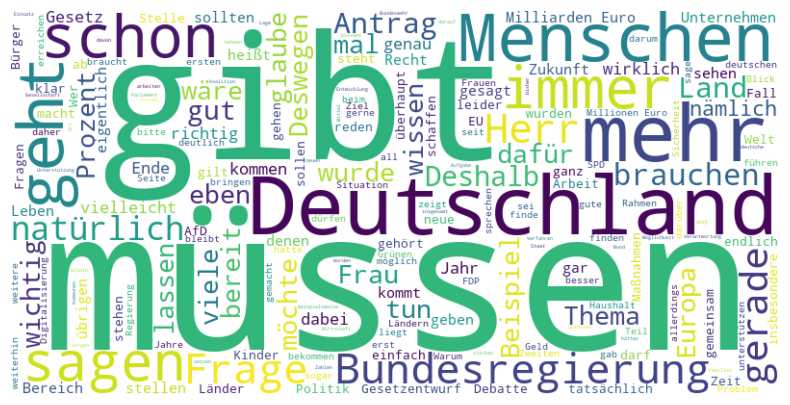

In [346]:
### Speeches NOT followed by any interjection
full_text_not_followed = ' '.join(df_not_followed_interjections['Paragraph'])
additional_stopwords = ["Kollegen", "Kolleginnen", "Liebe", "Präsidentin", "Präsident", "heute", "vielen", "Herren", "ja", "Damen", "Herzlichen", "Dank", "geehrte", "geehrter"]
german_stopwords = set(stopwords.words('german'))
german_stopwords.update(additional_stopwords)


wordcloud = WordCloud(stopwords=german_stopwords, background_color='white', width=800, height=400).generate(full_text_not_followed)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

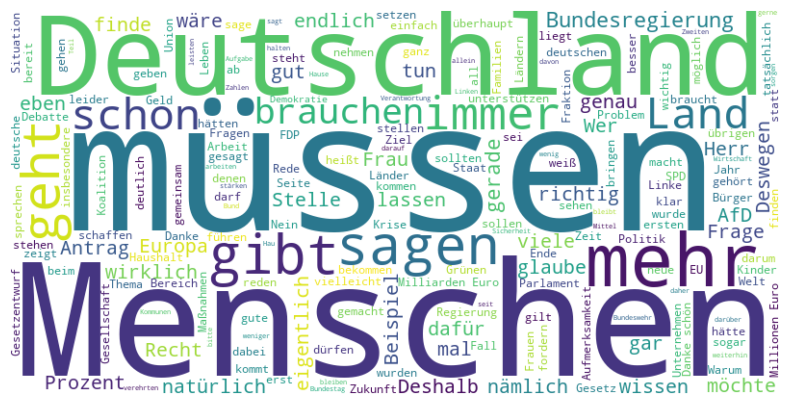

In [348]:
### Speeches followed nonverbal interjections
full_text_followed_nonverbal  = ' '.join(df_followed_nonverbal_interjections['Paragraph'])

german_stopwords = set(stopwords.words('german'))
german_stopwords.update(additional_stopwords)

wordcloud = WordCloud(stopwords=german_stopwords, background_color='white', width=800, height=400).generate(full_text_followed_nonverbal)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

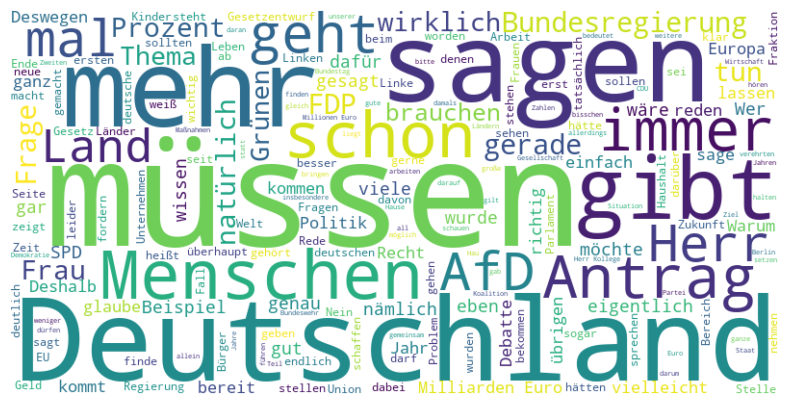

In [350]:
### Speeches followed verbal interjections
full_text_followed_verbal = ' '.join(df_followed_verbal_interjections['Paragraph'])
wordcloud = WordCloud(stopwords=german_stopwords, background_color='white', width=800, height=400).generate(full_text_followed_verbal)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [351]:
german_stopwords = set(stopwords.words('german'))
german_stopwords.update({"Kollegen", "Kolleginnen", "Liebe", "Präsidentin", "Präsident", "heute", "vielen", "Herren", "ja", "Damen", "Herzlichen", "Dank", "geehrte", "geehrter"})
custom_stopwords = list(map(str.lower, german_stopwords))


top_50_followed_nonverbal_full = get_top_n_tfidf_words(full_text_followed_nonverbal, n=50)
top_50_followed_verbal_full = get_top_n_tfidf_words(full_text_followed_verbal, n=50)
top_50_not_followed_full = get_top_n_tfidf_words(full_text_not_followed, n=50)


set_followed_nonverbal_full = set(word for word, _ in top_50_followed_nonverbal_full)
set_followed_verbal_full = set(word for word, _ in top_50_followed_verbal_full)
set_not_followed_full = set(word for word, _ in top_50_not_followed_full)


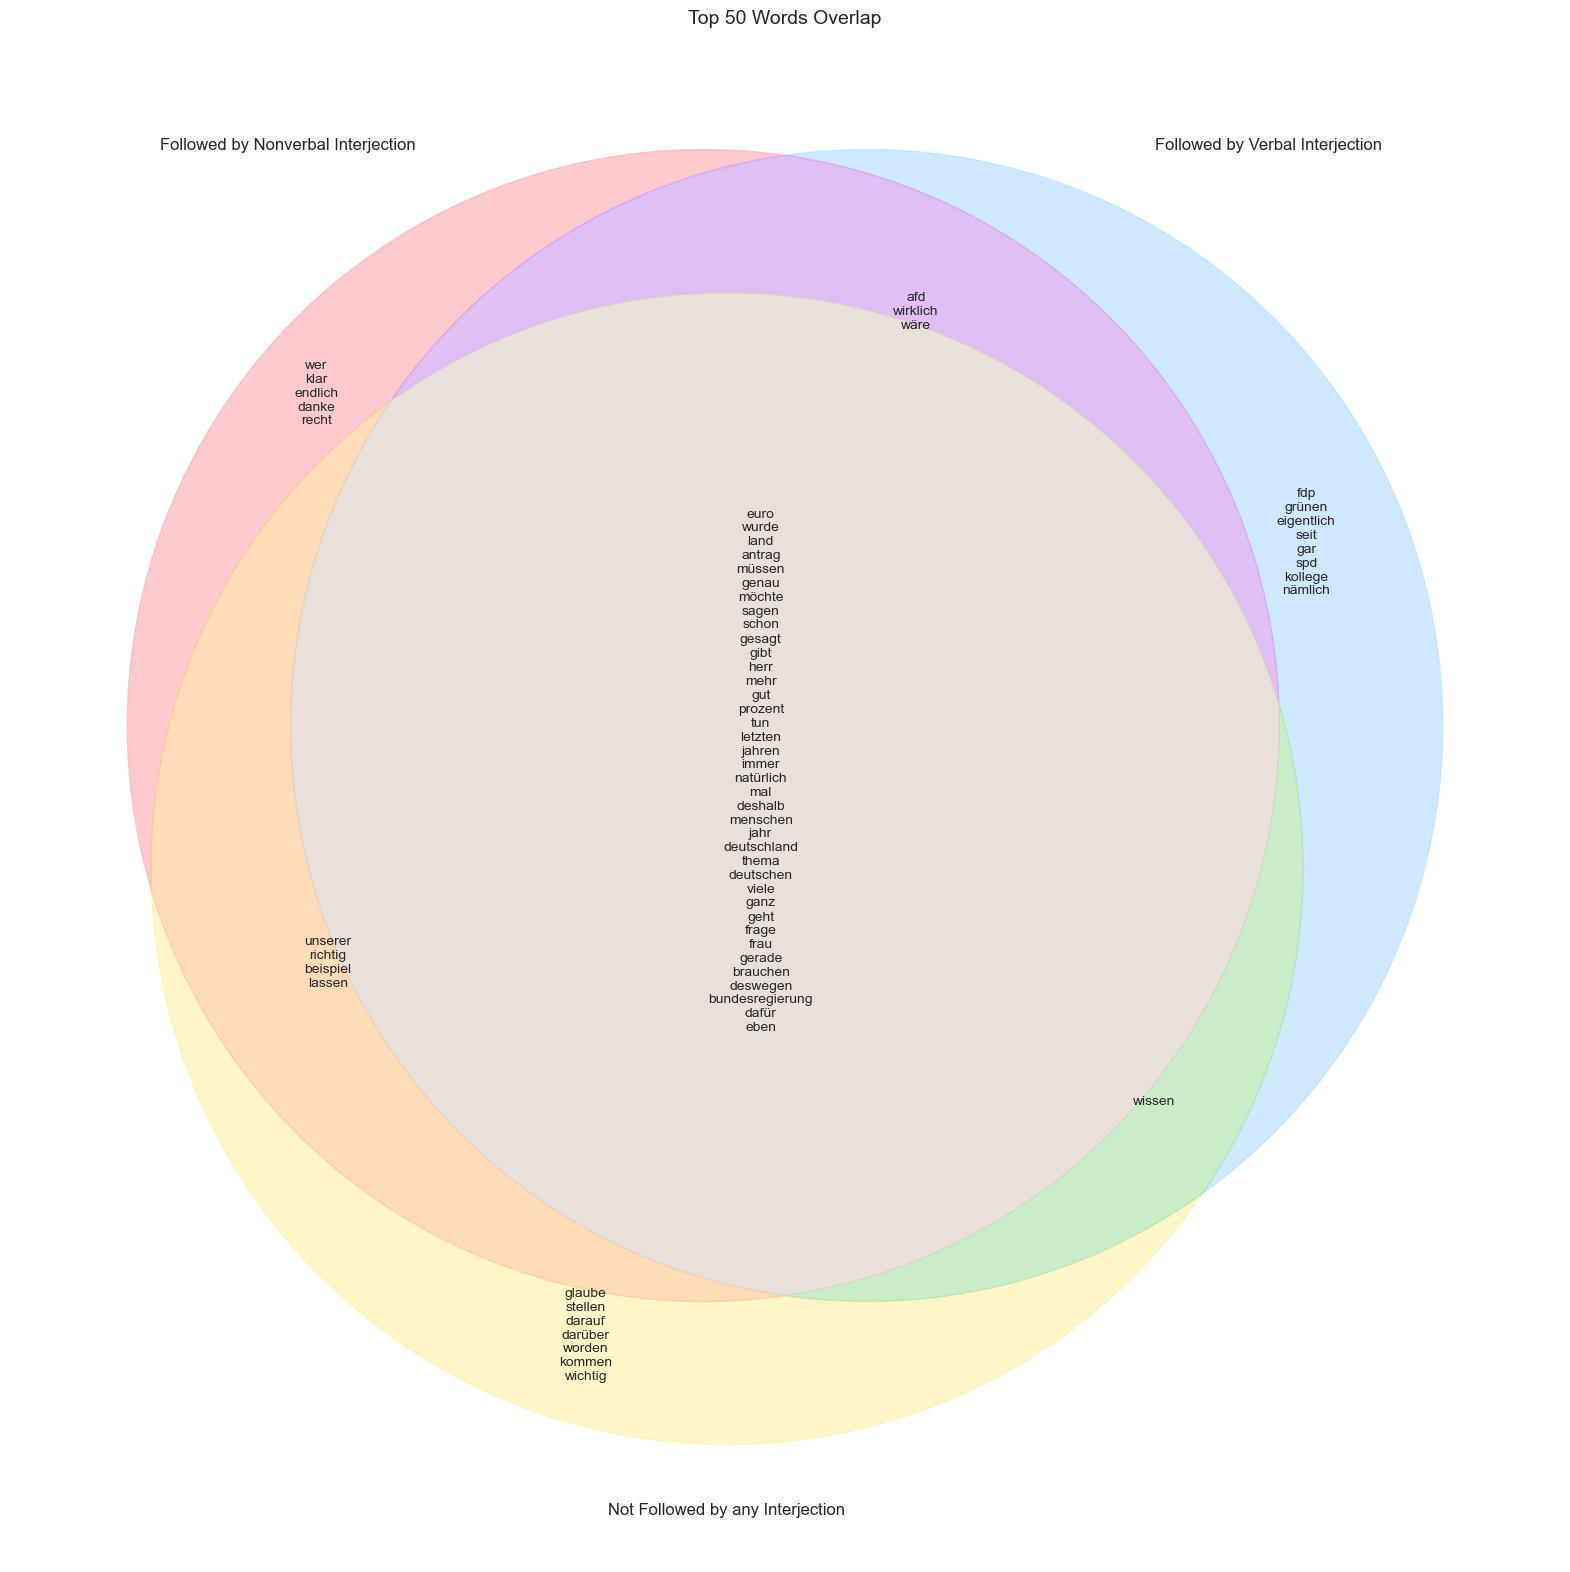

In [353]:
plt.figure(figsize=(20, 20))

venn = venn3([set_followed_nonverbal_full, set_followed_verbal_full, set_not_followed_full],
             set_labels=('Followed by Nonverbal Interjection',
                         'Followed by Verbal Interjection',
                         'Not Followed by any Interjection'))

venn.get_patch_by_id('100').set_color('#ffb3ba')
venn.get_patch_by_id('010').set_color('#bae1ff')
venn.get_patch_by_id('001').set_color('#fff2b3')
venn.get_patch_by_id('110').set_color('#d4a5f4')
venn.get_patch_by_id('101').set_color('#ffcc99')
venn.get_patch_by_id('011').set_color('#b3e6b3')
venn.get_patch_by_id('111').set_color('#e0d4cc')

for patch in venn.patches:
    if patch:
        patch.set_alpha(0.7)

venn.get_label_by_id('100').set_text("\n".join(set_followed_nonverbal_full - set_followed_verbal_full - set_not_followed_full))
venn.get_label_by_id('010').set_text("\n".join(set_followed_verbal_full - set_followed_nonverbal_full - set_not_followed_full))
venn.get_label_by_id('001').set_text("\n".join(set_not_followed_full - set_followed_nonverbal_full - set_followed_verbal_full))
venn.get_label_by_id('110').set_text("\n".join(set_followed_nonverbal_full & set_followed_verbal_full - set_not_followed_full))
venn.get_label_by_id('101').set_text("\n".join(set_followed_nonverbal_full & set_not_followed_full - set_followed_verbal_full))
venn.get_label_by_id('011').set_text("\n".join(set_followed_verbal_full & set_not_followed_full - set_followed_nonverbal_full))
venn.get_label_by_id('111').set_text("\n".join(set_followed_nonverbal_full & set_followed_verbal_full & set_not_followed_full))

plt.title("Top 50 Words Overlap", fontsize=14)
plt.show()

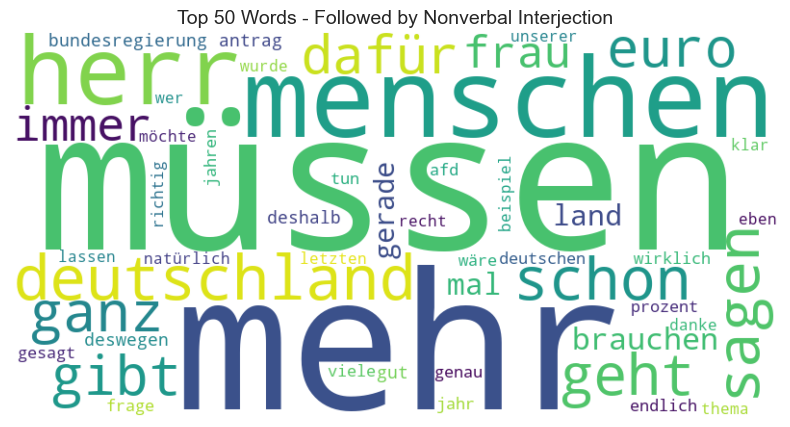

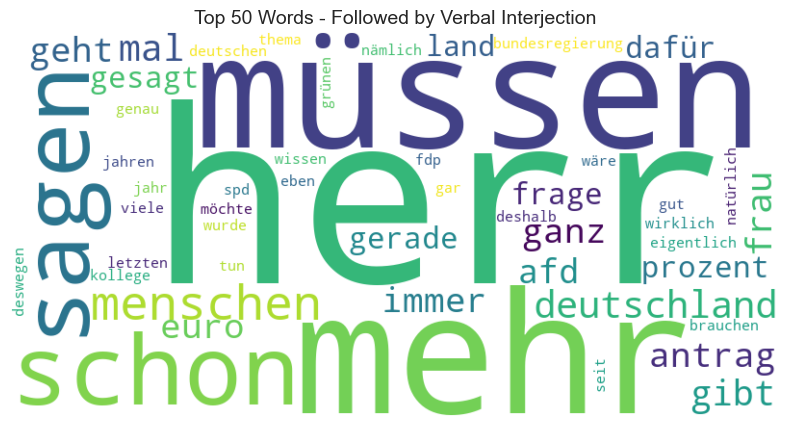

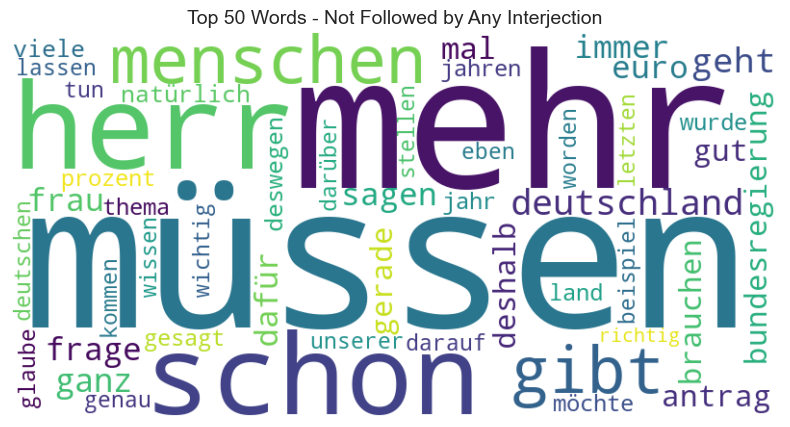

In [354]:
word_scores_nonverbal_full = dict(top_50_followed_nonverbal_full)
word_scores_verbal_full  = dict(top_50_followed_verbal_full)
word_scores_not_followed_full  = dict(top_50_not_followed_full)

generate_wordcloud(word_scores_nonverbal_full , "Top 50 Words - Followed by Nonverbal Interjection")
generate_wordcloud(word_scores_verbal_full , "Top 50 Words - Followed by Verbal Interjection")
generate_wordcloud(word_scores_not_followed_full , "Top 50 Words - Not Followed by Any Interjection")